In [1]:
import csv
import json
import numpy as np
import pandas as pd
import random as rn
import keras
import time
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from keras import backend as K

%matplotlib inline

# Reproducibility
seed = 40
np.random.seed(seed=seed)
tf.set_random_seed(seed=seed)

# config=tf.ConfigProto(device_count = {'GPU' : 2, 'CPU' : 16})
config=tf.ConfigProto(device_count = {'GPU' : 0, 'CPU' : 2})
sess = tf.Session(config=config)
K.set_session(sess)

Using TensorFlow backend.


## Training Phase 1: Synthetic Data

Launch power distribution is gaussian centered on 8.5 dBm with standard deviation = 1.0

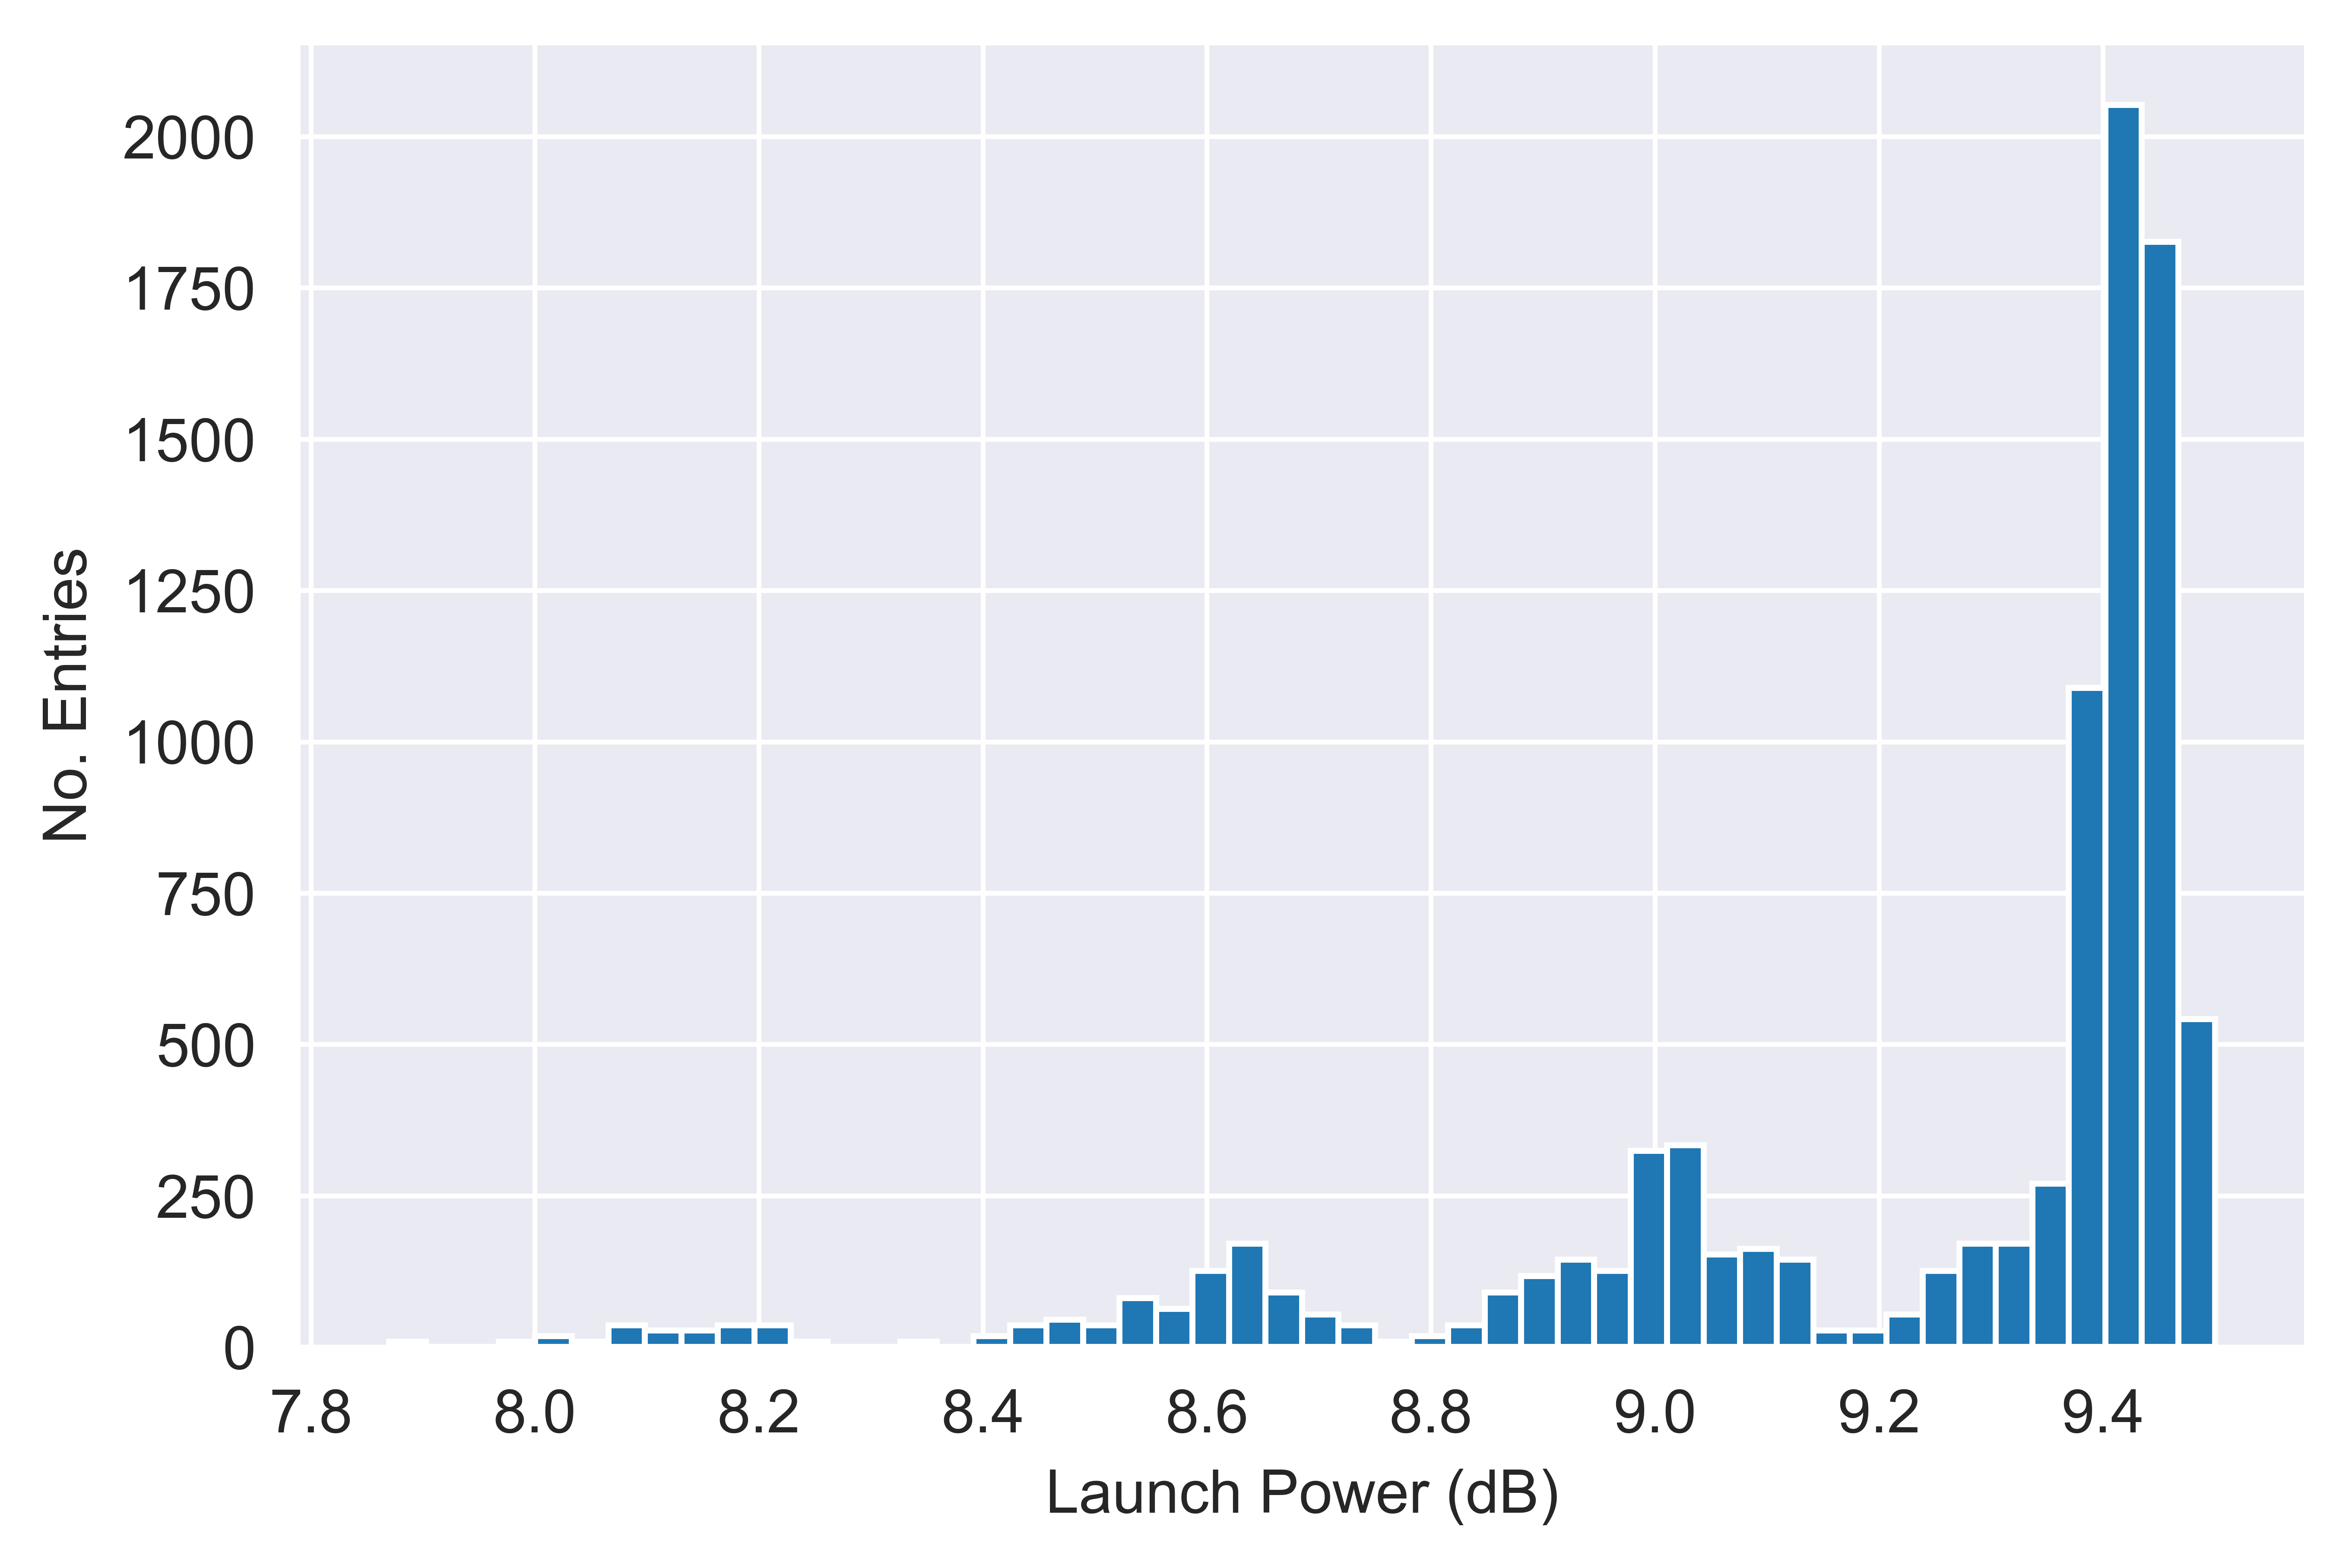

In [43]:
# Load and clean
sns.set_style("darkgrid")
df = pd.read_csv("gnpy_simulated_results.csv")

plt.rcParams["figure.dpi"] = 1000

lp_train_hist = df['launch_power_dbm'].hist(bins=50)
plt.xlabel("Launch Power (dB)")
plt.ylabel("No. Entries")
plt.savefig("Initial_ANN_LP_Dist_train.png")

In [6]:
type(lp_train_hist)

matplotlib.axes._subplots.AxesSubplot

In [ ]:
sns.pairplot(df.iloc[:,43:51])

In [103]:
dataset = df.values

# Split into x & y 
x = dataset[:,0:43]
y = dataset[:,43:51]

# Normalise
xScaler = MinMaxScaler()
xScaler.fit(x)
xTrainNorm = xScaler.transform(x)

yScaler = MinMaxScaler()
yScaler.fit(y)
yTrainNorm = yScaler.transform(y)

In [14]:
K.clear_session()

def opt_model():
    model = Sequential()
    model.add(Dense(40, activation='relu', kernel_regularizer=regularizers.l2(0.00001), input_dim = 43 ))
    model.add(Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.00001)))
    model.add(Dense(8, activation='sigmoid', kernel_regularizer=regularizers.l2(0.00001)))
    model.compile(loss='mean_squared_error',
                  optimizer='adam',
                  metrics=['mean_squared_error', 'mean_absolute_error'])
    print(model.summary())
    return model

# Implement model with sci-kit regressor interface
model = KerasRegressor(build_fn=opt_model, verbose=0)

In [15]:
estimator = KerasRegressor(build_fn=opt_model, epochs=40, batch_size=20)
kf = KFold(n_splits=5, random_state=None)
results = cross_val_score(estimator, xTrainNorm, yTrainNorm, cv=kf)
print("Standardized: %.6f (%.6f) MSE" % (results.mean(), results.std()))




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 40)                1760      
_________________________________________________________________
dense_2 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 168       
Total params: 2,748
Trainable params: 2,748
Non-trainable params: 0
_________________________________________________________________
None


Epoch 1/40




7193/7193 [==============================] - 3s 420us/step - loss: 0.0930 - mean_squared_error: 0.0922 - mean_absolute_error: 0.2680
Epoch 2/40
7193/7193 [==============================] - 1s 143us/step - loss: 0.0066 - mean_squared_error: 0.0054 - mean_absolute_error: 0.0552
Epoch 3/40
7193/7193 [==============================] - 2s 210us/step - loss: 0.0020 - mean_squared_er

7193/7193 [==============================] - 1s 117us/step - loss: 0.0010 - mean_squared_error: 9.2224e-05 - mean_absolute_error: 0.0074
Epoch 39/40
7193/7193 [==============================] - 1s 125us/step - loss: 0.0010 - mean_squared_error: 8.9882e-05 - mean_absolute_error: 0.0073
Epoch 40/40
1799/1799 [==============================] - 0s 182us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 40)                1760      
_________________________________________________________________
dense_5 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 168       
Total params: 2,748
Trainable params: 2,748
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
7193/7193 [====================

7194/7194 [==============================] - 1s 203us/step - loss: 0.0061 - mean_squared_error: 0.0049 - mean_absolute_error: 0.0524
Epoch 3/40
7194/7194 [==============================] - 1s 180us/step - loss: 0.0019 - mean_squared_error: 6.3573e-04 - mean_absolute_error: 0.0193
Epoch 4/40
7194/7194 [==============================] - 1s 178us/step - loss: 0.0016 - mean_squared_error: 2.8446e-04 - mean_absolute_error: 0.0126
Epoch 5/40
7194/7194 [==============================] - 1s 174us/step - loss: 0.0015 - mean_squared_error: 1.7826e-04 - mean_absolute_error: 0.0100
Epoch 6/40
7194/7194 [==============================] - 1s 182us/step - loss: 0.0014 - mean_squared_error: 1.3079e-04 - mean_absolute_error: 0.0085
Epoch 7/40
7194/7194 [==============================] - 1s 196us/step - loss: 0.0014 - mean_squared_error: 1.0816e-04 - mean_absolute_error: 0.0078
Epoch 8/40
7194/7194 [==============================] - 1s 204us/step - loss: 0.0013 - mean_squared_error: 9.6973e-05 - mean_ab

7194/7194 [==============================] - 1s 168us/step - loss: 0.0013 - mean_squared_error: 1.1390e-04 - mean_absolute_error: 0.0081
Epoch 12/40
7194/7194 [==============================] - 1s 150us/step - loss: 0.0013 - mean_squared_error: 1.0221e-04 - mean_absolute_error: 0.0078
Epoch 13/40
7194/7194 [==============================] - 1s 150us/step - loss: 0.0012 - mean_squared_error: 1.0305e-04 - mean_absolute_error: 0.0078
Epoch 14/40
7194/7194 [==============================] - 1s 155us/step - loss: 0.0012 - mean_squared_error: 1.0515e-04 - mean_absolute_error: 0.0079
Epoch 15/40
7194/7194 [==============================] - 1s 145us/step - loss: 0.0012 - mean_squared_error: 9.9958e-05 - mean_absolute_error: 0.0077
Epoch 16/40
7194/7194 [==============================] - 1s 162us/step - loss: 0.0012 - mean_squared_error: 9.2109e-05 - mean_absolute_error: 0.0073
Epoch 17/40
7194/7194 [==============================] - 1s 171us/step - loss: 0.0012 - mean_squared_error: 1.0629e-04

7194/7194 [==============================] - 1s 164us/step - loss: 0.0011 - mean_squared_error: 8.5656e-05 - mean_absolute_error: 0.0071
Epoch 20/40
7194/7194 [==============================] - 1s 156us/step - loss: 0.0011 - mean_squared_error: 8.1142e-05 - mean_absolute_error: 0.0067
Epoch 21/40
7194/7194 [==============================] - 2s 260us/step - loss: 0.0011 - mean_squared_error: 8.1005e-05 - mean_absolute_error: 0.0069
Epoch 22/40
7194/7194 [==============================] - 2s 283us/step - loss: 0.0011 - mean_squared_error: 8.4151e-05 - mean_absolute_error: 0.0070
Epoch 23/40
7194/7194 [==============================] - 1s 176us/step - loss: 0.0011 - mean_squared_error: 9.1064e-05 - mean_absolute_error: 0.00730s - loss: 0.0011 - mean_squared_error: 9.1180e-05 - mean_absolu
Epoch 24/40
7194/7194 [==============================] - 1s 174us/step - loss: 0.0011 - mean_squared_error: 7.7550e-05 - mean_absolute_error: 0.0066
Epoch 25/40
7194/7194 [==============================]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 40)                1760      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 168       
Total params: 2,748
Trainable params: 2,748
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
8992/8992 [==============================] - 5s 518us/step - loss: 0.0822 - mean_squared_error: 0.0813 - mean_absolute_error: 0.2419
Epoch 2/40
8992/8992 [==============================] - 2s 183us/step - loss: 0.0040 - mean_squared_error: 0.0028 - mean_absolute_error: 0.0430
Epoch 3/40
8992/8992 [==============================] - 1s 143us/step - loss: 0.0023 - mean_squared_error: 0.00

No handles with labels found to put in legend.


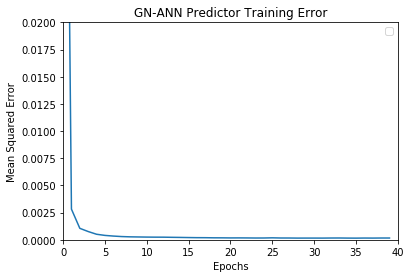

In [9]:
# Plot Training Error

history = estimator.fit(xTrainNorm, yTrainNorm)
plt.plot(history.history['mean_squared_error'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.axis([0, 40, 0, 0.02])
plt.title("GN-ANN Predictor Training Error")
plt.legend(loc='upper right')
plt.savefig('gANN_Train_Error.png', bbox_inches='tight', dpi=1000)
plt.show()

In [10]:
from keras.utils import plot_model
plot_model(opt_model(), show_shapes=True, to_file='gANN_model_0.1_.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 40)                1760      
_________________________________________________________________
dense_20 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_21 (Dense)             (None, 8)                 168       
Total params: 2,748
Trainable params: 2,748
Non-trainable params: 0
_________________________________________________________________
None


## Test Phase 1: New synthetic data from new distribution

,launch_power_dbm,edfa_uob_input_power,edfa_uob_output_power,edfa_brd_input_power,edfa_brd_output_power,edfa_ffd_input_power,edfa_ffd_output_power,edfa_rdg_input_power,edfa_rdg_output_power,edfa_pgt_input_power,...,Status_Ch7,Status_Ch8,snr_Ch1,snr_Ch2,snr_Ch3,snr_Ch4,snr_Ch5,snr_Ch6,snr_Ch7,snr_Ch8
0,10.26,19.2909,19.290921,4.200003,26.200046,-4.459627,17.540689,-3.644491,18.355772,-8.482892,...,0.0,0.0,0.0,0.000000,17.863687,0.0,0.000000,0.000000,0.0,0.000000
1,9.73,18.7609,18.760924,3.669771,25.669820,-5.001130,16.999229,-4.186127,17.814170,-9.024781,...,0.0,0.0,0.0,0.000000,18.923687,0.0,18.830084,18.923687,0.0,0.000000
2,9.31,18.3409,18.340926,3.249625,25.249678,-5.428462,16.571934,-4.613534,17.386794,-9.452340,...,0.0,1.0,0.0,0.000000,19.763687,0.0,0.000000,19.763687,0.0,20.719828
3,7.70,16.7309,16.730938,1.639271,23.639348,-7.056485,14.944090,-6.241655,15.758822,-11.080764,...,0.0,1.0,0.0,0.000000,22.983687,0.0,22.890084,0.000000,0.0,23.939828
4,10.42,19.4509,19.450920,4.360085,26.360126,-4.295572,17.704732,-3.480386,18.519867,-8.318697,...,0.0,1.0,0.0,0.000000,17.543687,0.0,17.450084,17.543687,0.0,18.499828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,7.65,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,27.201724,0.000000,0.0,0.000000,26.957695,0.0,0.000000
888,7.34,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,27.821724,0.000000,0.0,27.484092,27.577695,0.0,0.000000
889,9.47,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,23.561724,0.000000,0.0,0.000000,23.317695,0.0,24.273836
890,8.50,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,1.0,0.0,25.501724,0.000000,0.0,25.164092,25.257695,0.0,26.213836


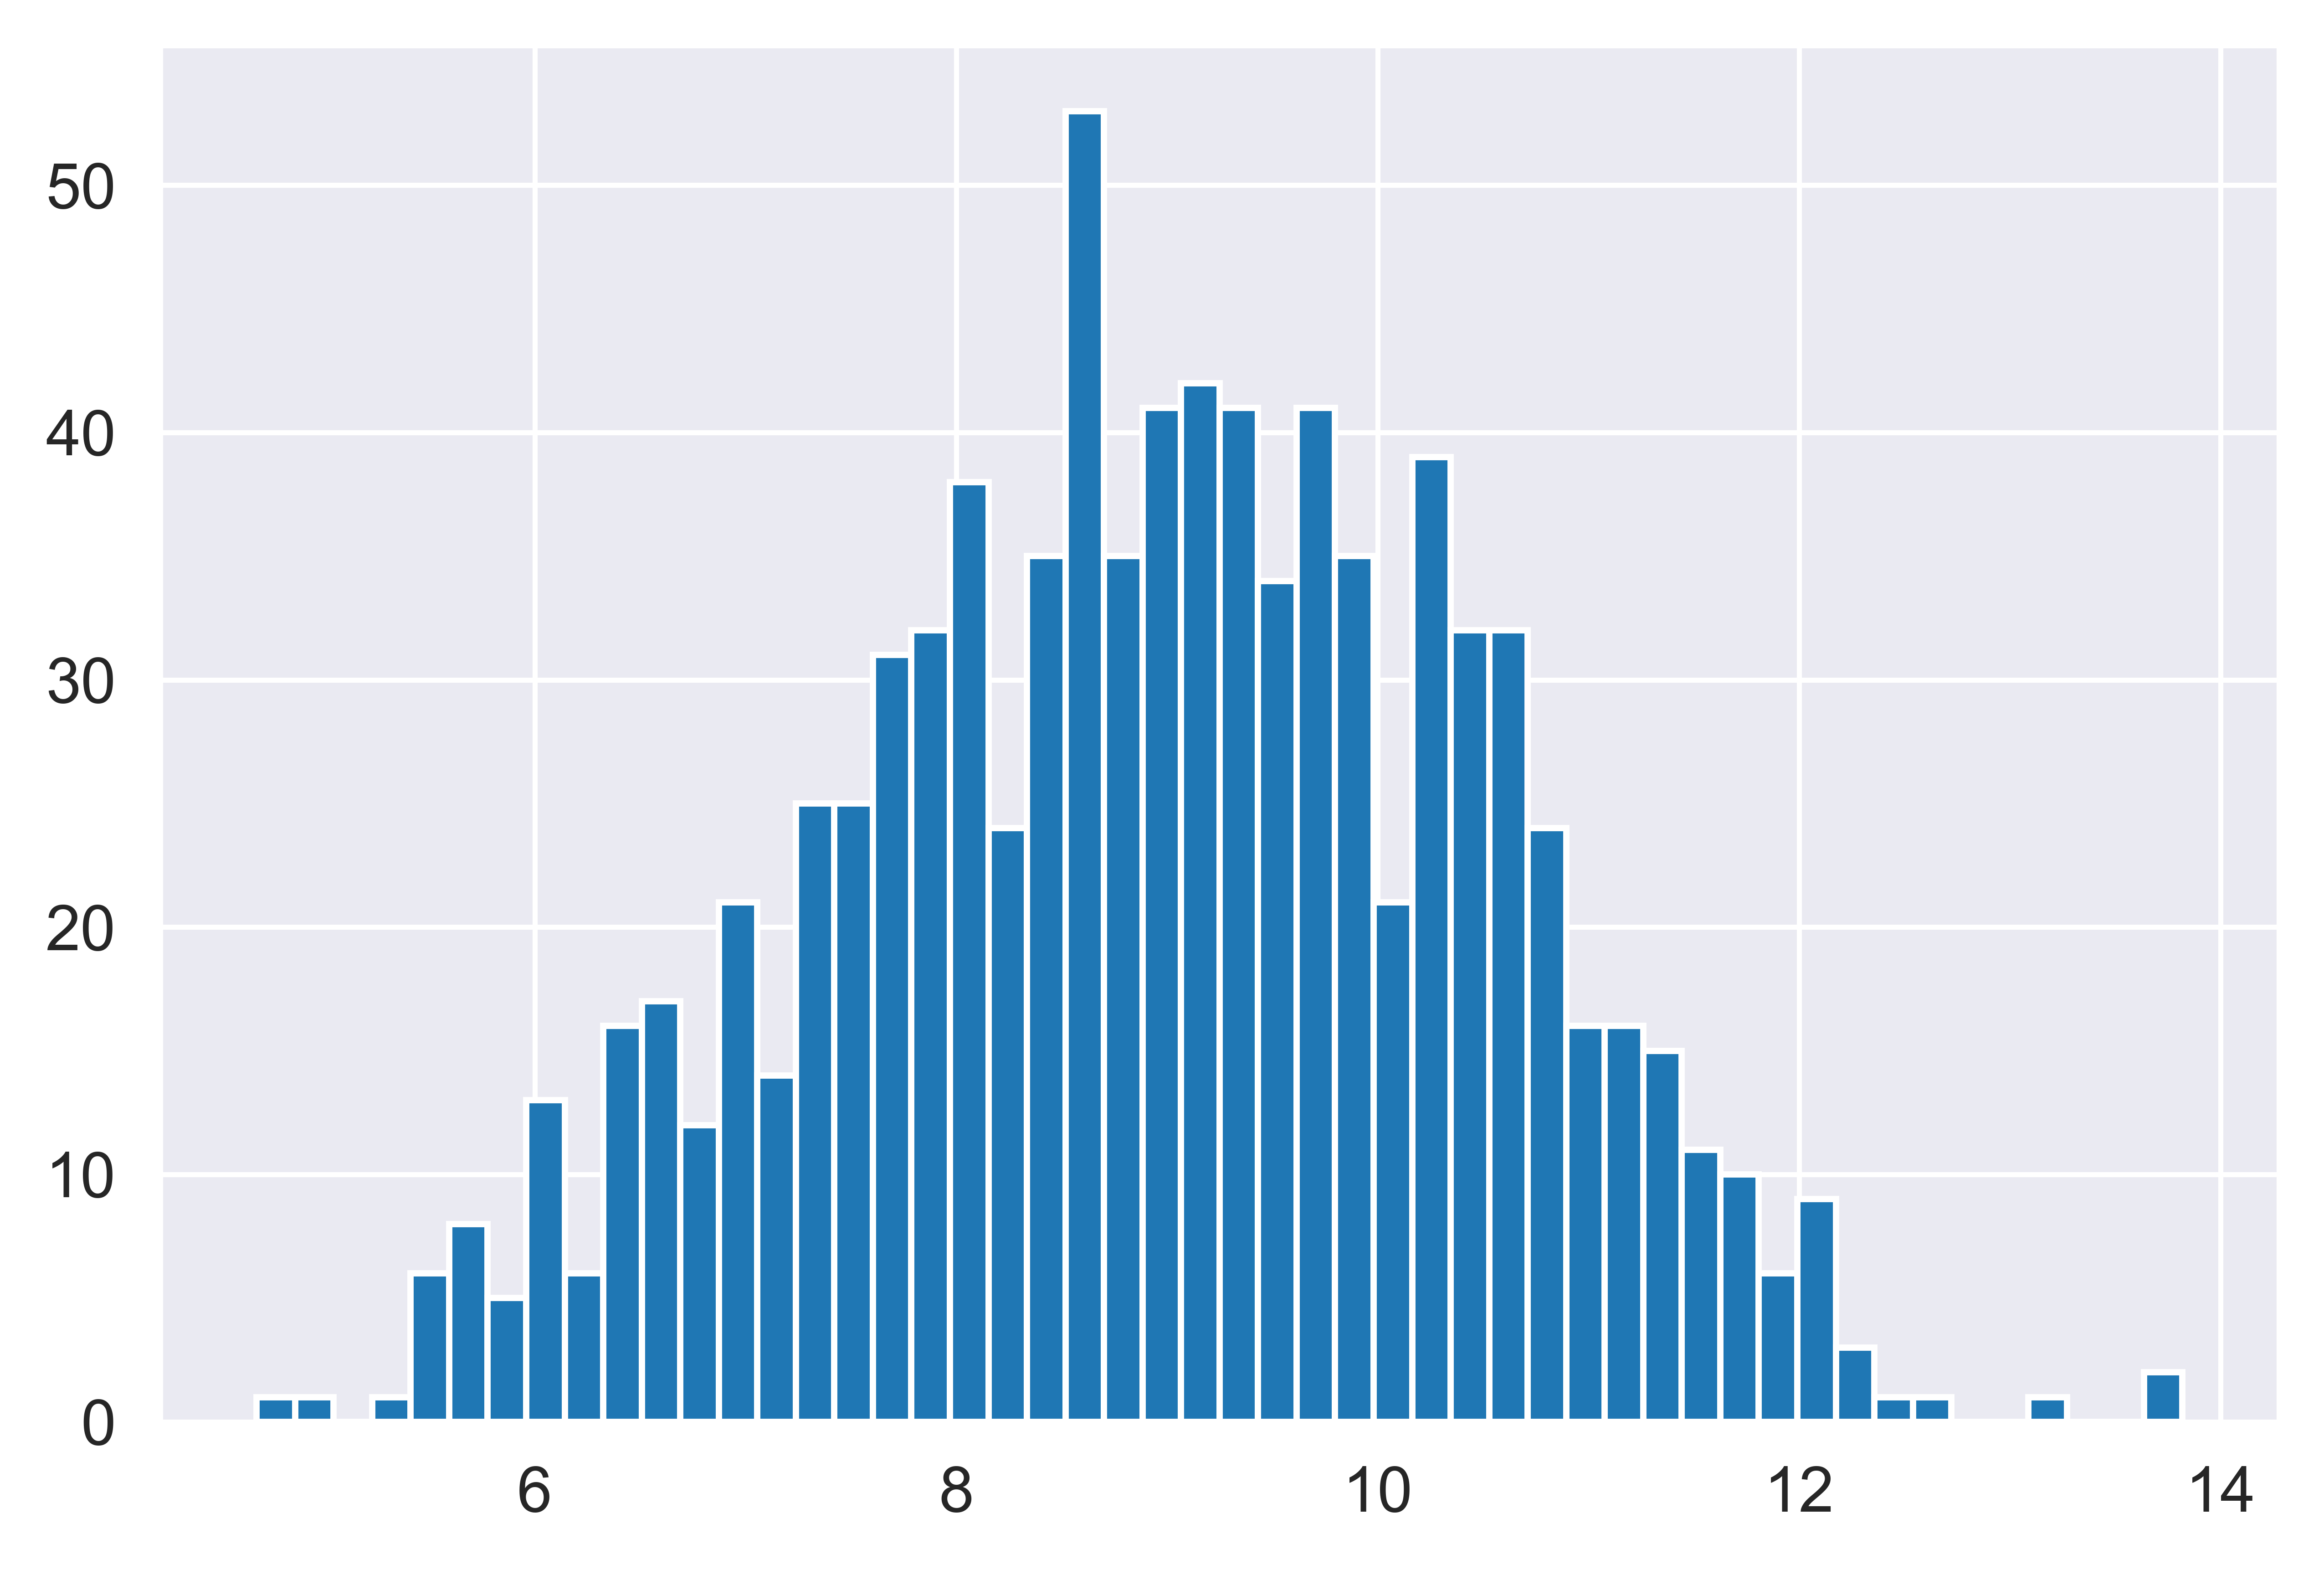

In [87]:
test_df = pd.read_csv("gnpy_simulated_results_test.csv")
lp_test_hist = test_df['launch_power_dbm'].hist(bins=50)
plt.savefig("Initial_ANN_LP_Dist_test.png")

test_df

In [107]:
test_ds = test_df.values

# Split into x & y 
xTest = test_ds[:500, 0:43]
yTest = test_ds[:500, 43:51]

# Normalise
xTestNorm = xScaler.transform(xTest)
yTestNorm = yScaler.transform(yTest)

In [108]:
xTest.shape

(500, 43)

In [86]:
test_df.iloc[50:60,:]

,launch_power_dbm,edfa_uob_input_power,edfa_uob_output_power,edfa_brd_input_power,edfa_brd_output_power,edfa_ffd_input_power,edfa_ffd_output_power,edfa_rdg_input_power,edfa_rdg_output_power,edfa_pgt_input_power,...,Status_Ch7,Status_Ch8,snr_Ch1,snr_Ch2,snr_Ch3,snr_Ch4,snr_Ch5,snr_Ch6,snr_Ch7,snr_Ch8
50,12.94,21.9709,21.970911,6.882626,28.882649,-1.652258,20.347908,-0.835357,21.164780,-5.670766,...,1.0,0.0,13.459828,12.747716,12.503687,0.000000,12.410084,0.000000,12.747716,0.000000
51,11.82,20.8509,20.850915,5.761133,27.761163,-2.844204,19.156014,-2.028326,19.971855,-6.865440,...,1.0,0.0,15.699828,14.987716,14.743687,0.000000,14.650084,14.743687,14.987716,0.000000
52,12.64,21.6709,21.670912,6.582148,28.582173,-1.975168,20.025011,-1.158594,20.841554,-5.994546,...,1.0,0.0,14.059828,13.347716,13.103687,0.000000,0.000000,0.000000,13.347716,0.000000
53,9.57,18.6009,18.600925,3.509712,25.509762,-5.164090,16.836282,-4.349119,17.651189,-9.187835,...,1.0,1.0,20.199828,19.487716,19.243687,0.000000,0.000000,19.243687,19.487716,20.199828
54,10.98,20.0109,20.010918,4.920425,26.920461,-3.718817,18.281450,-2.903414,19.096807,-7.741340,...,1.0,1.0,17.379828,16.667716,16.423687,0.000000,16.330084,0.000000,16.667716,17.379828
55,13.99,23.0209,23.020909,7.934932,29.934950,-0.493518,21.506609,0.324934,22.325039,-4.507921,...,1.0,1.0,11.359828,10.647716,10.403687,0.000000,10.310084,10.403687,10.647716,11.359828
56,15.10,24.1309,24.130907,9.048944,31.048958,0.799471,22.799565,1.620477,23.620555,-3.208204,...,0.0,0.0,0.000000,0.000000,8.183687,8.090084,0.000000,8.183687,0.000000,0.000000
57,13.11,22.1409,22.140911,7.052928,29.052950,-1.467861,20.532297,-0.650755,21.349377,-5.485823,...,0.0,0.0,0.000000,0.000000,12.163687,12.070084,12.070084,0.000000,0.000000,0.000000
58,10.31,19.3409,19.340921,4.250028,26.250070,-4.408392,17.591921,-3.593240,18.407019,-8.431614,...,0.0,0.0,0.000000,0.000000,17.763687,17.670084,17.670084,17.763687,0.000000,0.000000
59,10.10,19.1309,19.130922,4.039927,26.039971,-4.623397,17.376932,-3.808306,18.191966,-8.646791,...,0.0,1.0,0.000000,0.000000,18.183687,18.090084,0.000000,0.000000,0.000000,19.139828


In [17]:
estimator.fit(xTrainNorm, yTrainNorm)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 40)                1760      
_________________________________________________________________
dense_17 (Dense)             (None, 20)                820       
_________________________________________________________________
dense_18 (Dense)             (None, 8)                 168       
Total params: 2,748
Trainable params: 2,748
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
8992/8992 [==============================] - 4s 391us/step - loss: 0.0784 - mean_squared_error: 0.0775 - mean_absolute_error: 0.2348
Epoch 2/40
8992/8992 [==============================] - 1s 153us/step - loss: 0.0034 - mean_squared_error: 0.0022 - mean_absolute_error: 0.0369
Epoch 3/40
8992/8992 [==============================] - 2s 233us/step - loss: 0.0018 - mean_squared_error: 5.40

In [109]:
prediction = estimator.predict(xTestNorm)

In [110]:
yInversePredict = yScaler.inverse_transform(prediction)

In [111]:
mean_squared_error(yTest, yInversePredict)
# 3.3477634644288683

1.3142017373512194

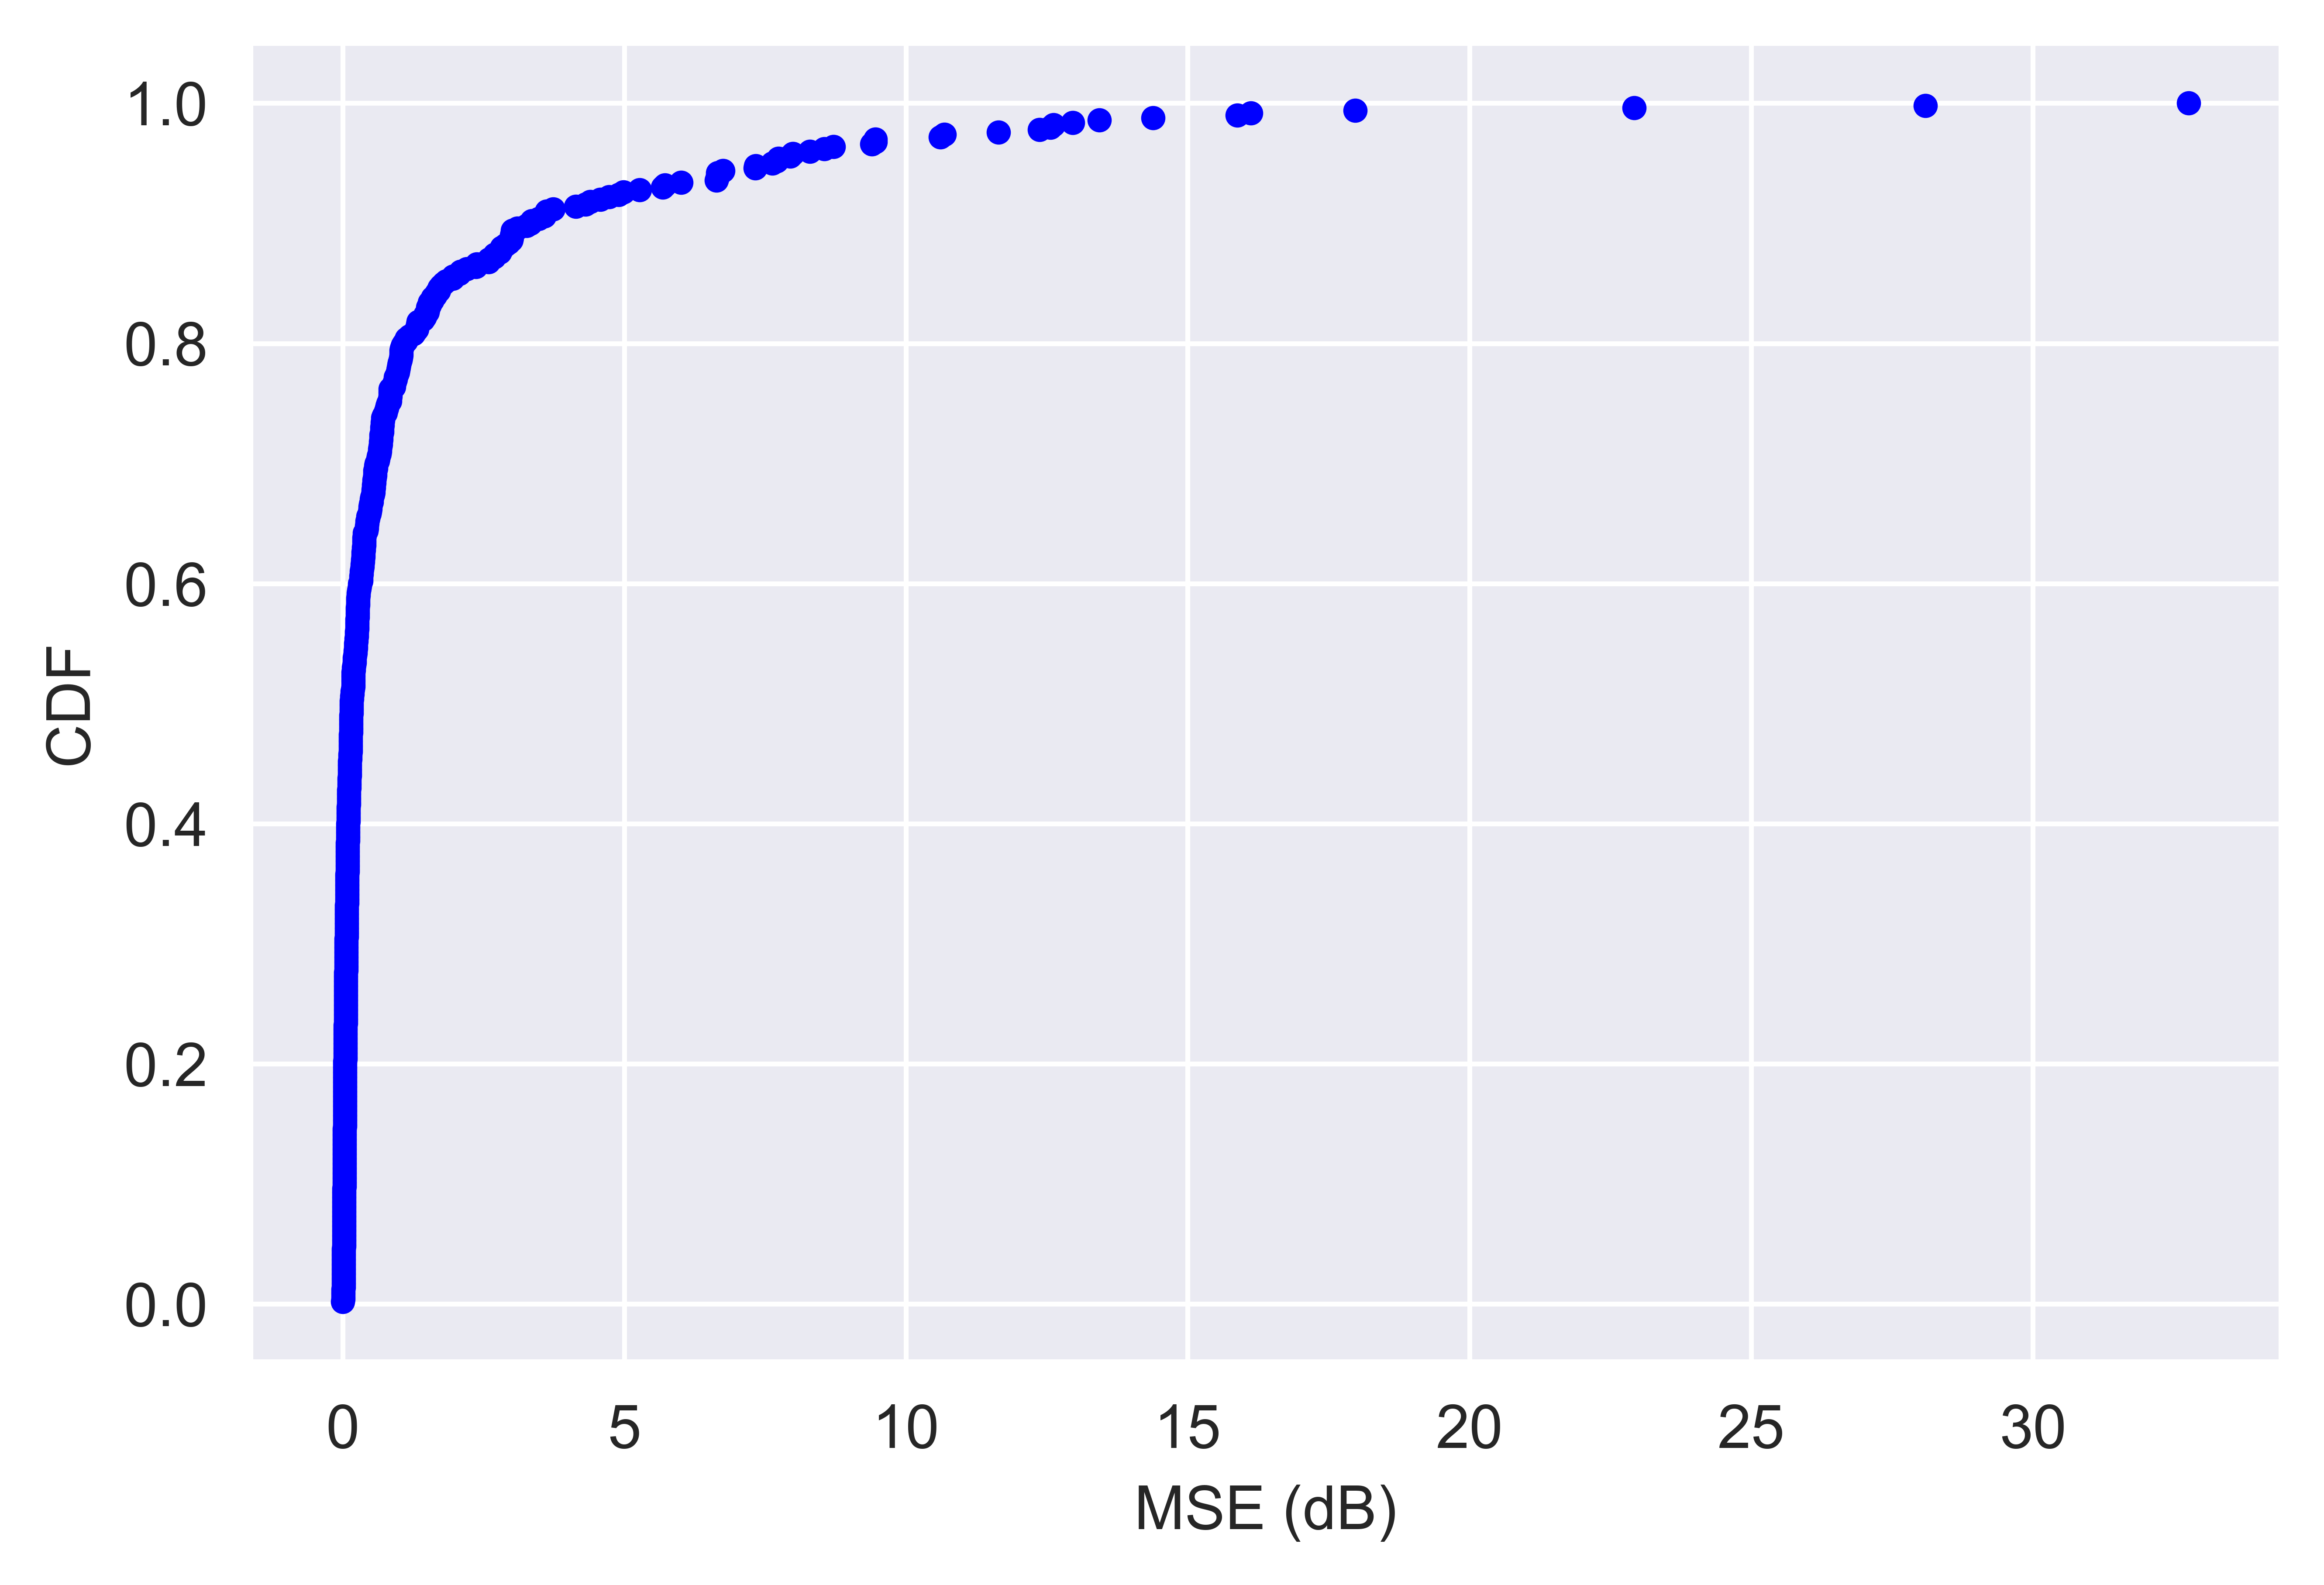

In [112]:
mseArray = []
for i in range(500):
    mseArray.append(mean_squared_error(yTest[i], yInversePredict[i]))

x = np.sort(mseArray)
y = np.arange(1, len(x)+1) / len(x)

mse_ecdf = plt.plot(x,y, marker='.', linestyle='none', color='blue')
plt.xlabel("MSE (dB)")
plt.ylabel("CDF")
plt.savefig("CDF_500_samples_100_test_points.png")

In [117]:
x[450]

3.3589486501184913

In [114]:
np.where(mseArray == np.amax(mseArray))

(array([421]),)

In [115]:
sns.set_style("darkgrid")

channels = [1,2,3,4,5,6,7,8,1,2,3,4,5,6,7,8]
pred_or_not = ['Actual']*8 + ['Predicted']*8

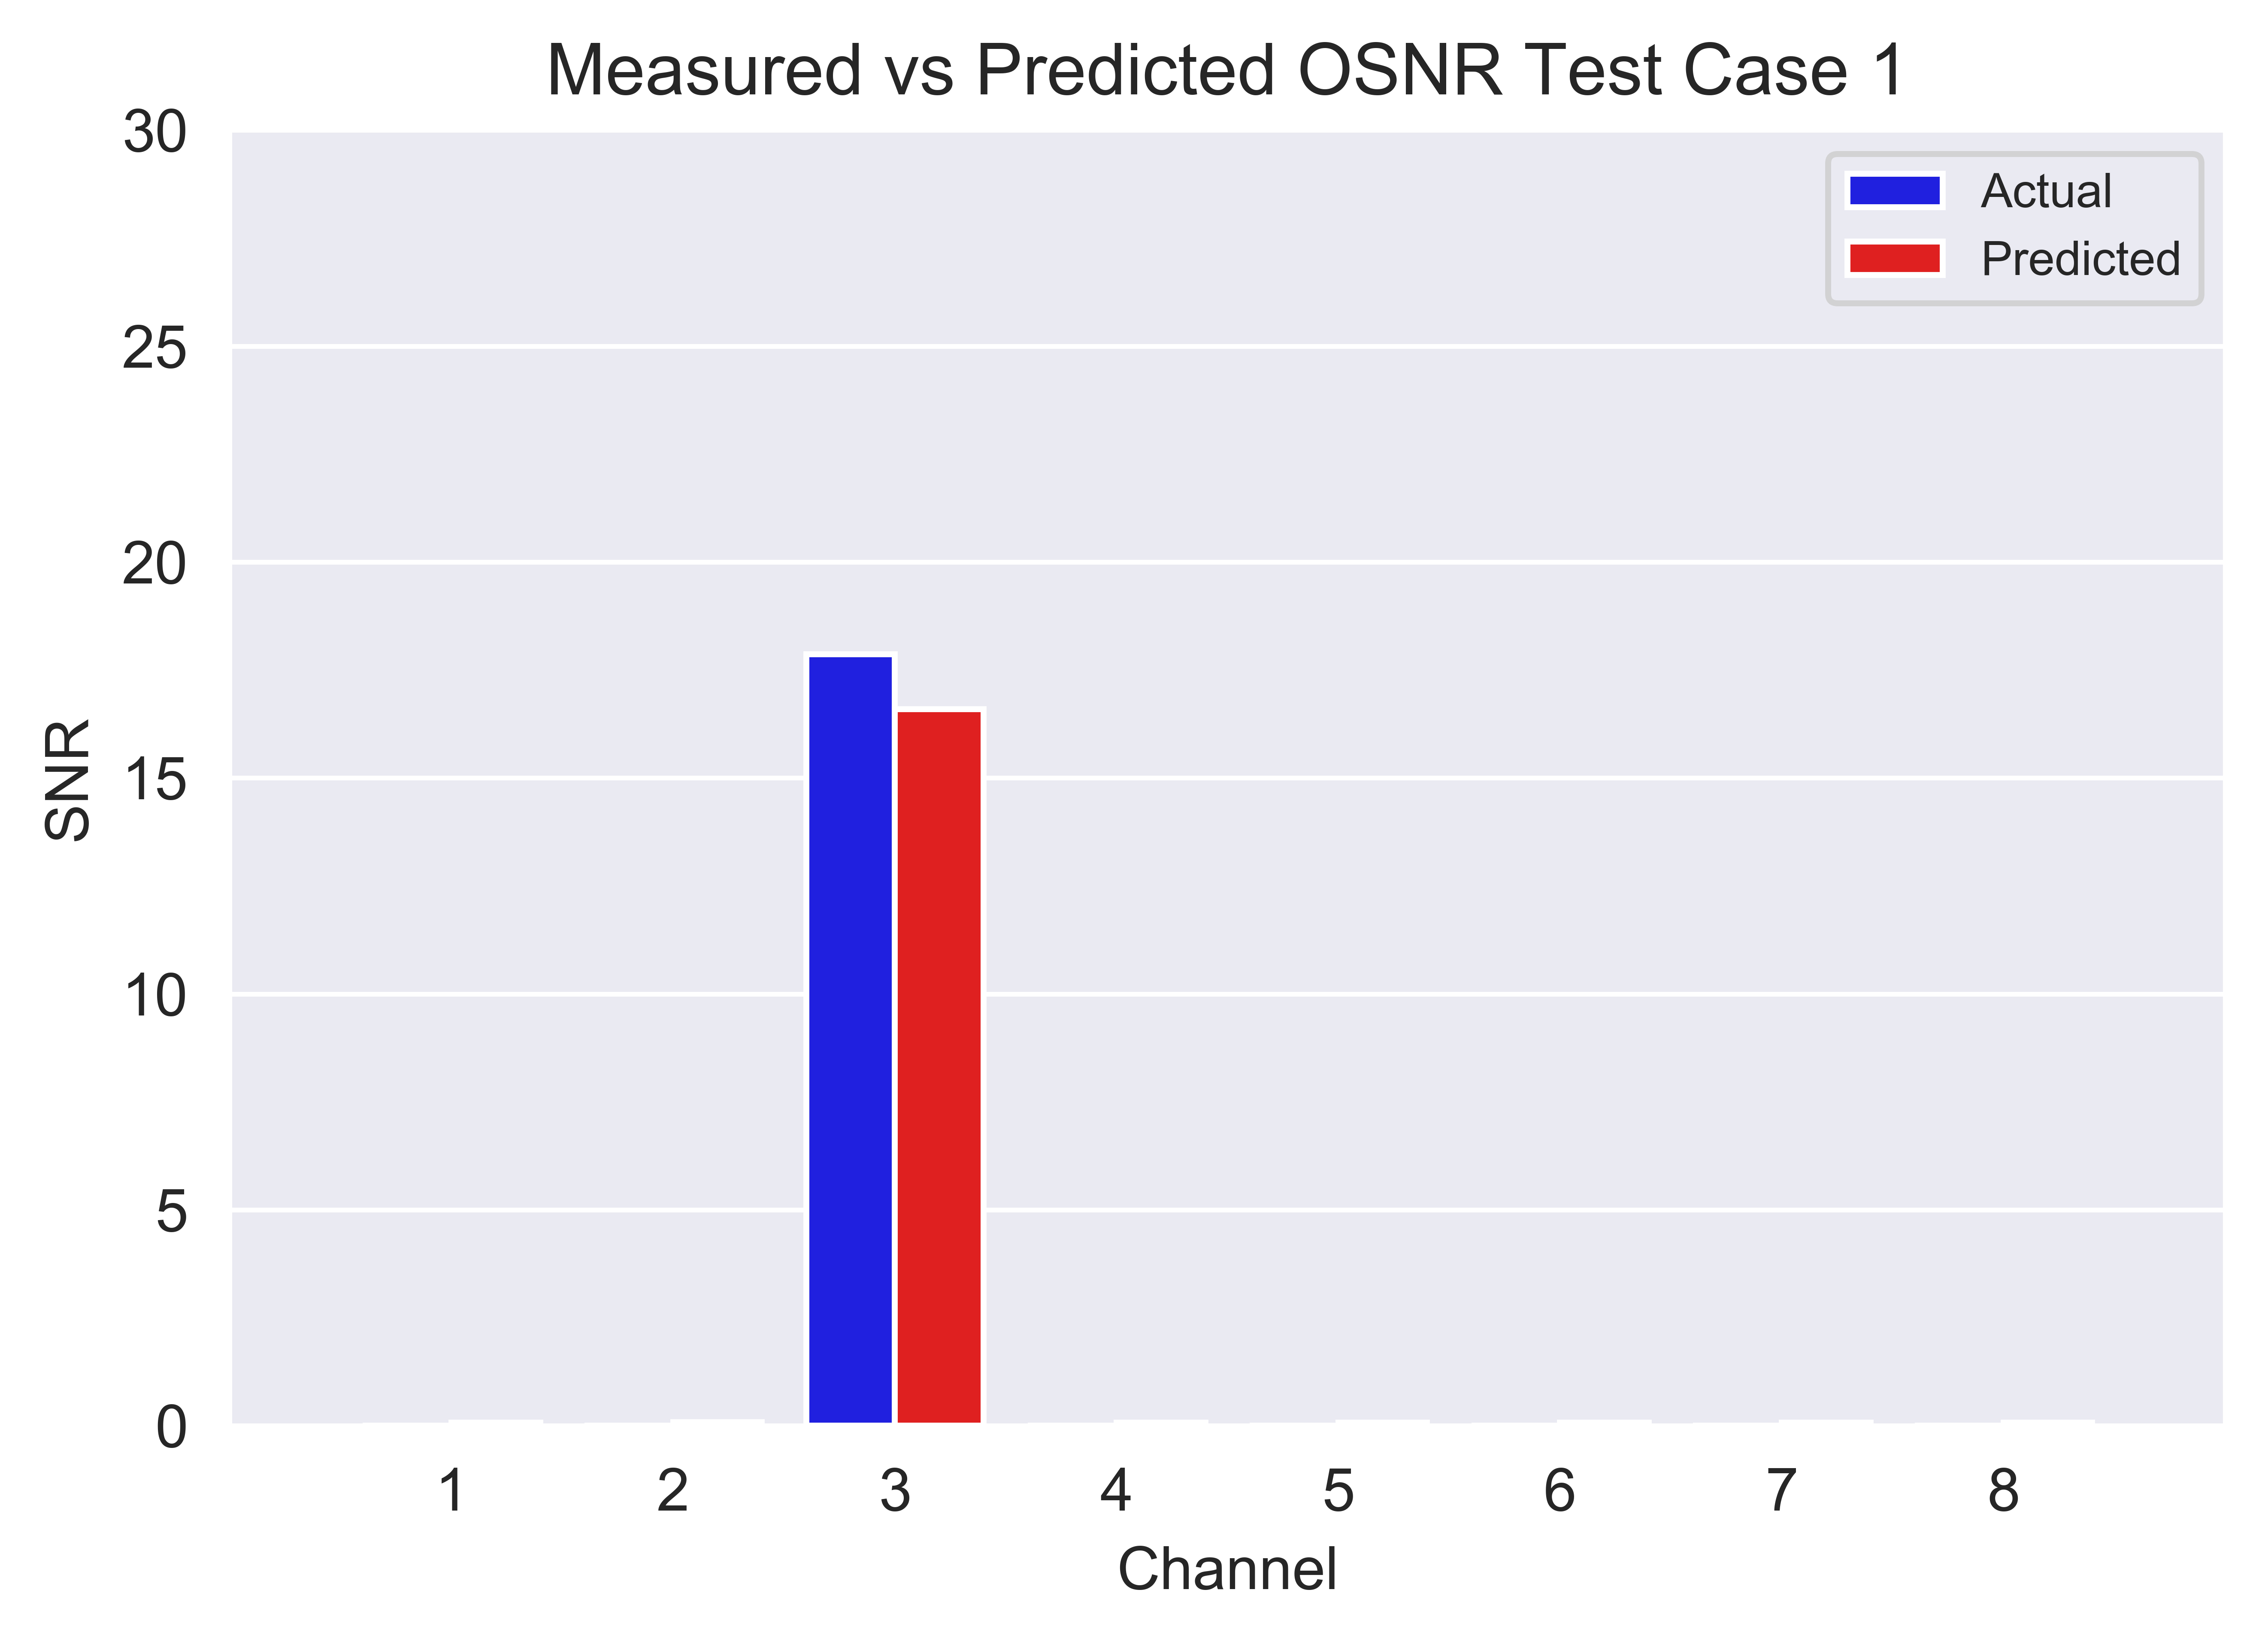

In [123]:
# Graph accuracy per test case
yVals = np.concatenate([yTest[0], yInversePredict[0]])
df_compiled = pd.DataFrame(list(zip(channels, yVals, pred_or_not)), columns =['Channel', 'SNR', 'Key'])
fig0 = sns.barplot(data = df_compiled, x='Channel', y='SNR', hue='Key', palette=['blue', 'red'])

plt.ylim(0, 30)
plt.xlim(-1, 8)
plt.title("Measured vs Predicted OSNR Test Case 1")
plt.legend(loc='upper right', prop={'size': 8}, borderaxespad=0.5)
plt.savefig('gANN_initial_pred1', bbox_inches='tight', dpi=1000)

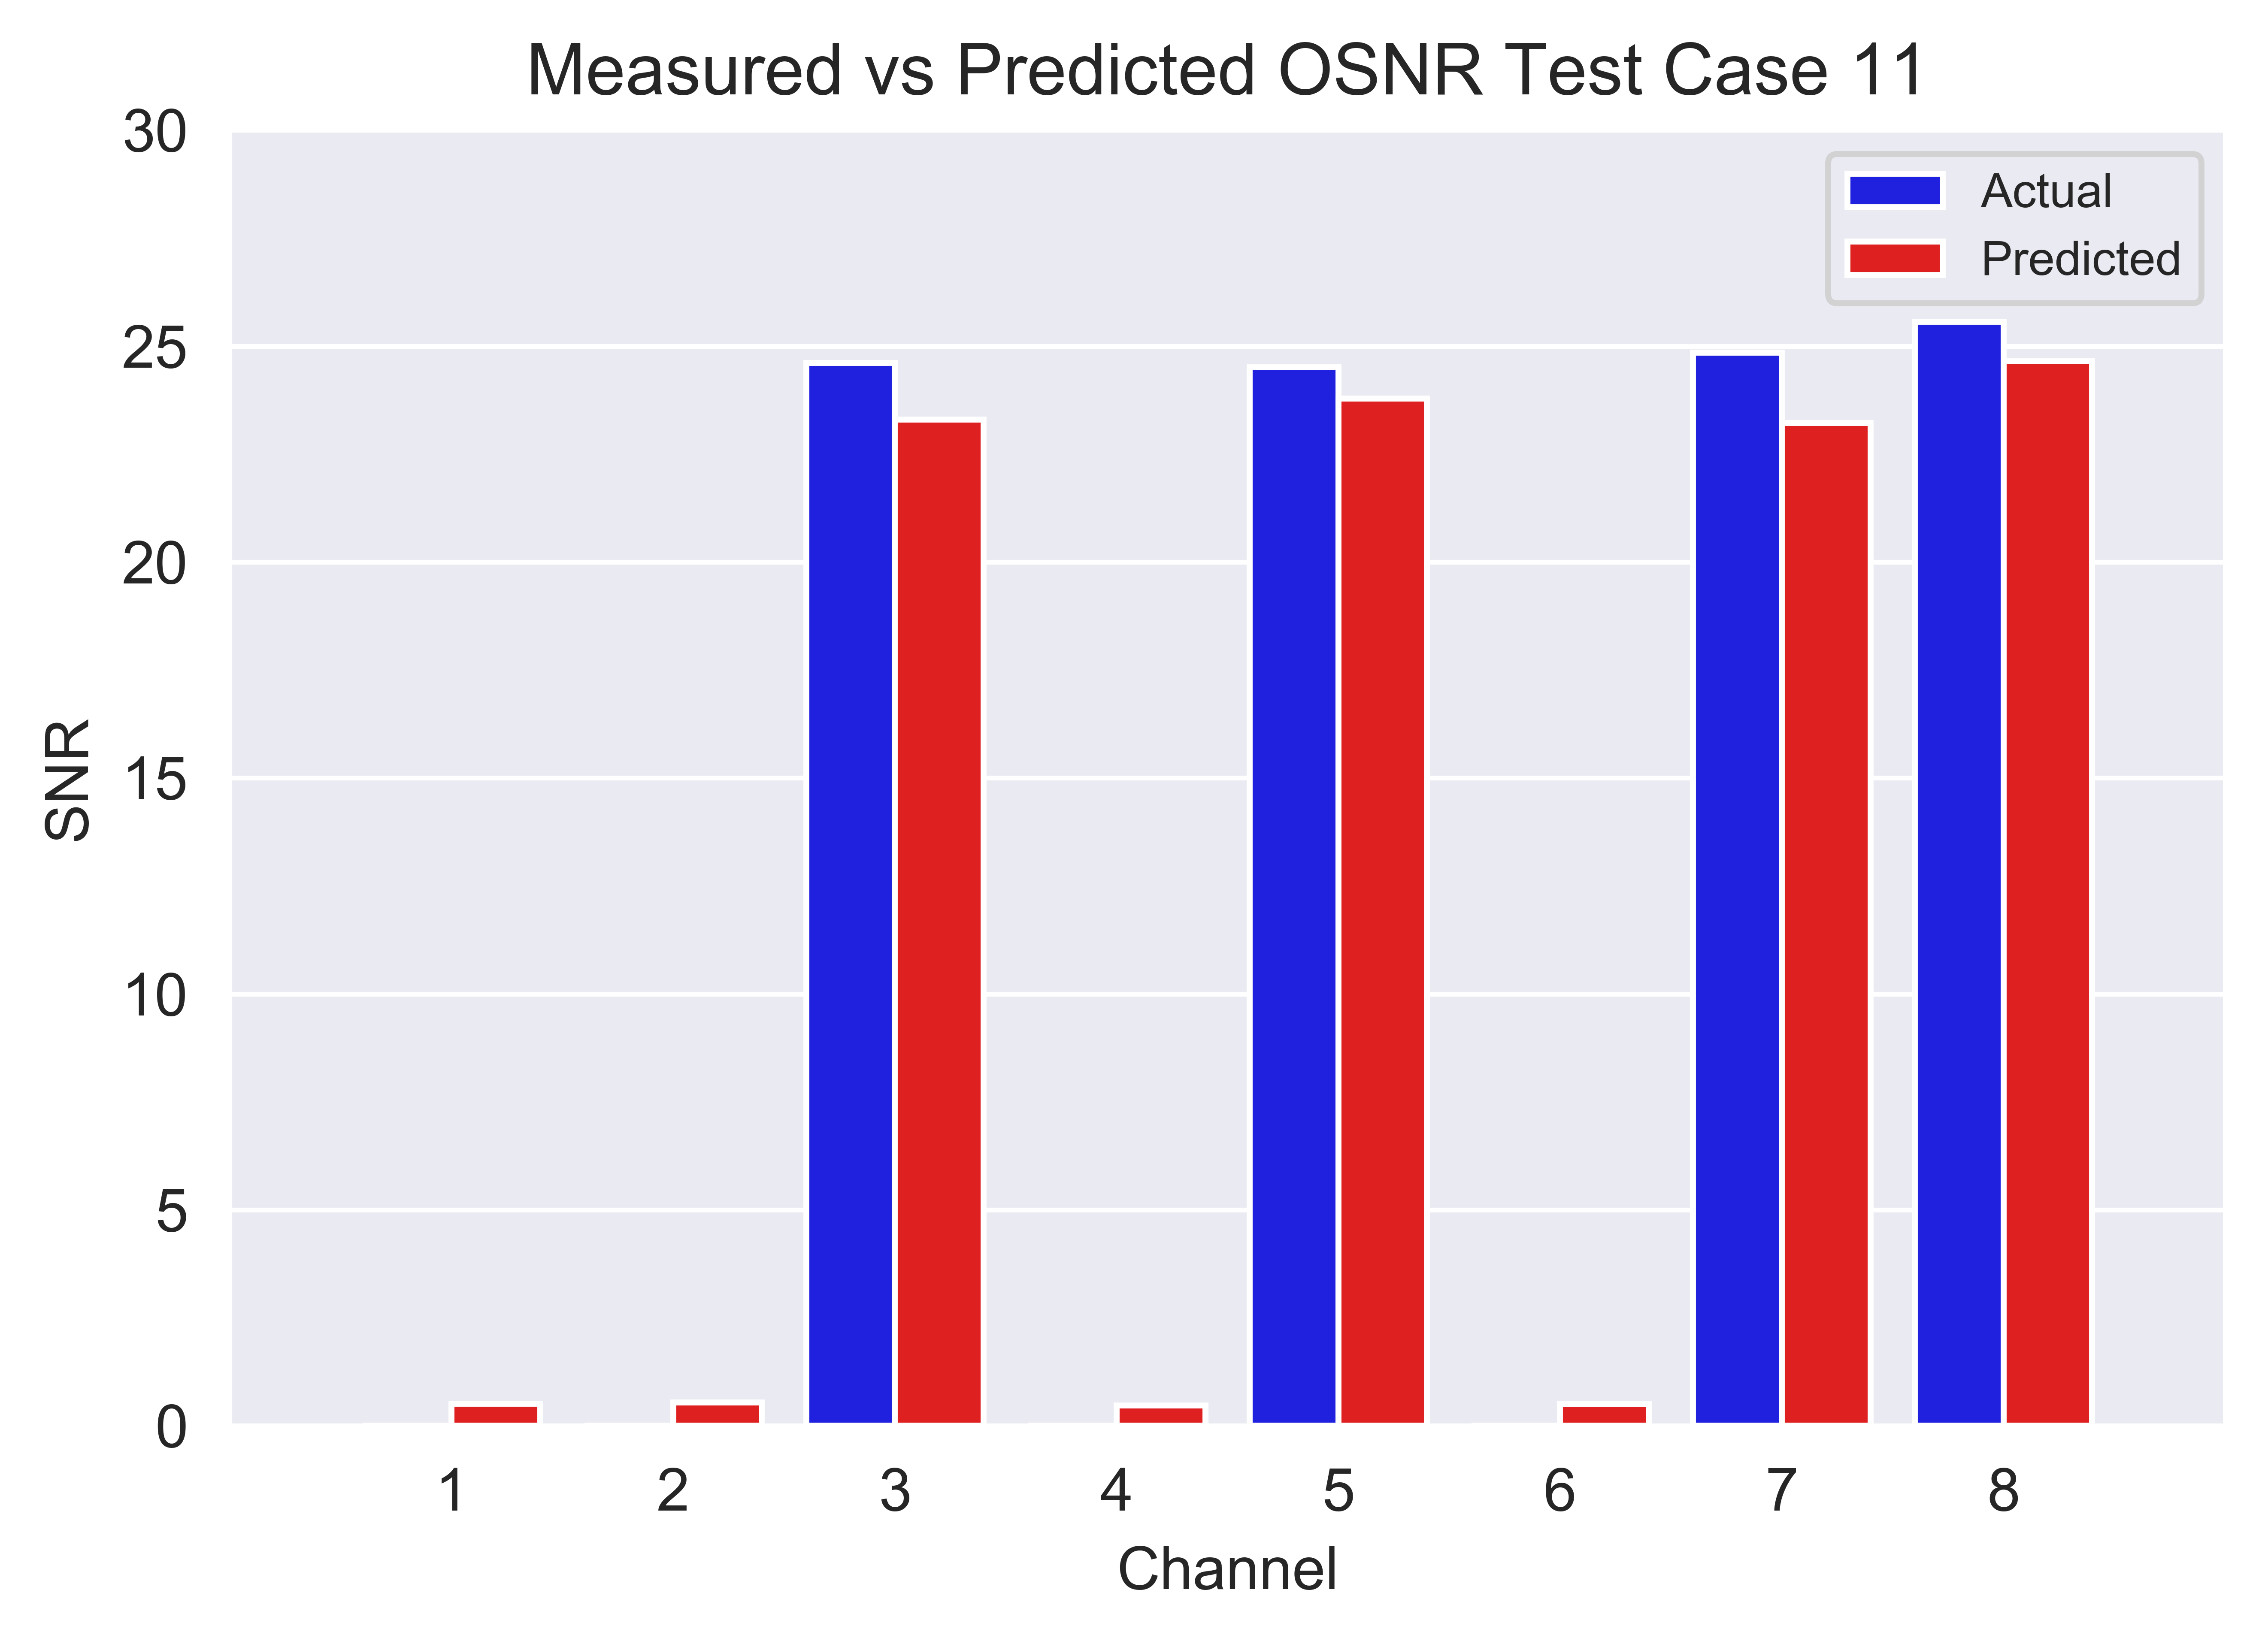

In [124]:
# Graph accuracy per test case
yVals = np.concatenate([yTest[10], yInversePredict[10]])
df_compiled = pd.DataFrame(list(zip(channels, yVals, pred_or_not)), columns =['Channel', 'SNR', 'Key'])
fig0 = sns.barplot(data = df_compiled, x='Channel', y='SNR', hue='Key', palette=['blue', 'red'])

plt.ylim(0, 30)
plt.xlim(-1, 8)
plt.title("Measured vs Predicted OSNR Test Case 11")
plt.legend(loc='upper right', prop={'size': 8}, borderaxespad=0.5)
plt.savefig('gANN_initial_pred_11', bbox_inches='tight', dpi=1000)

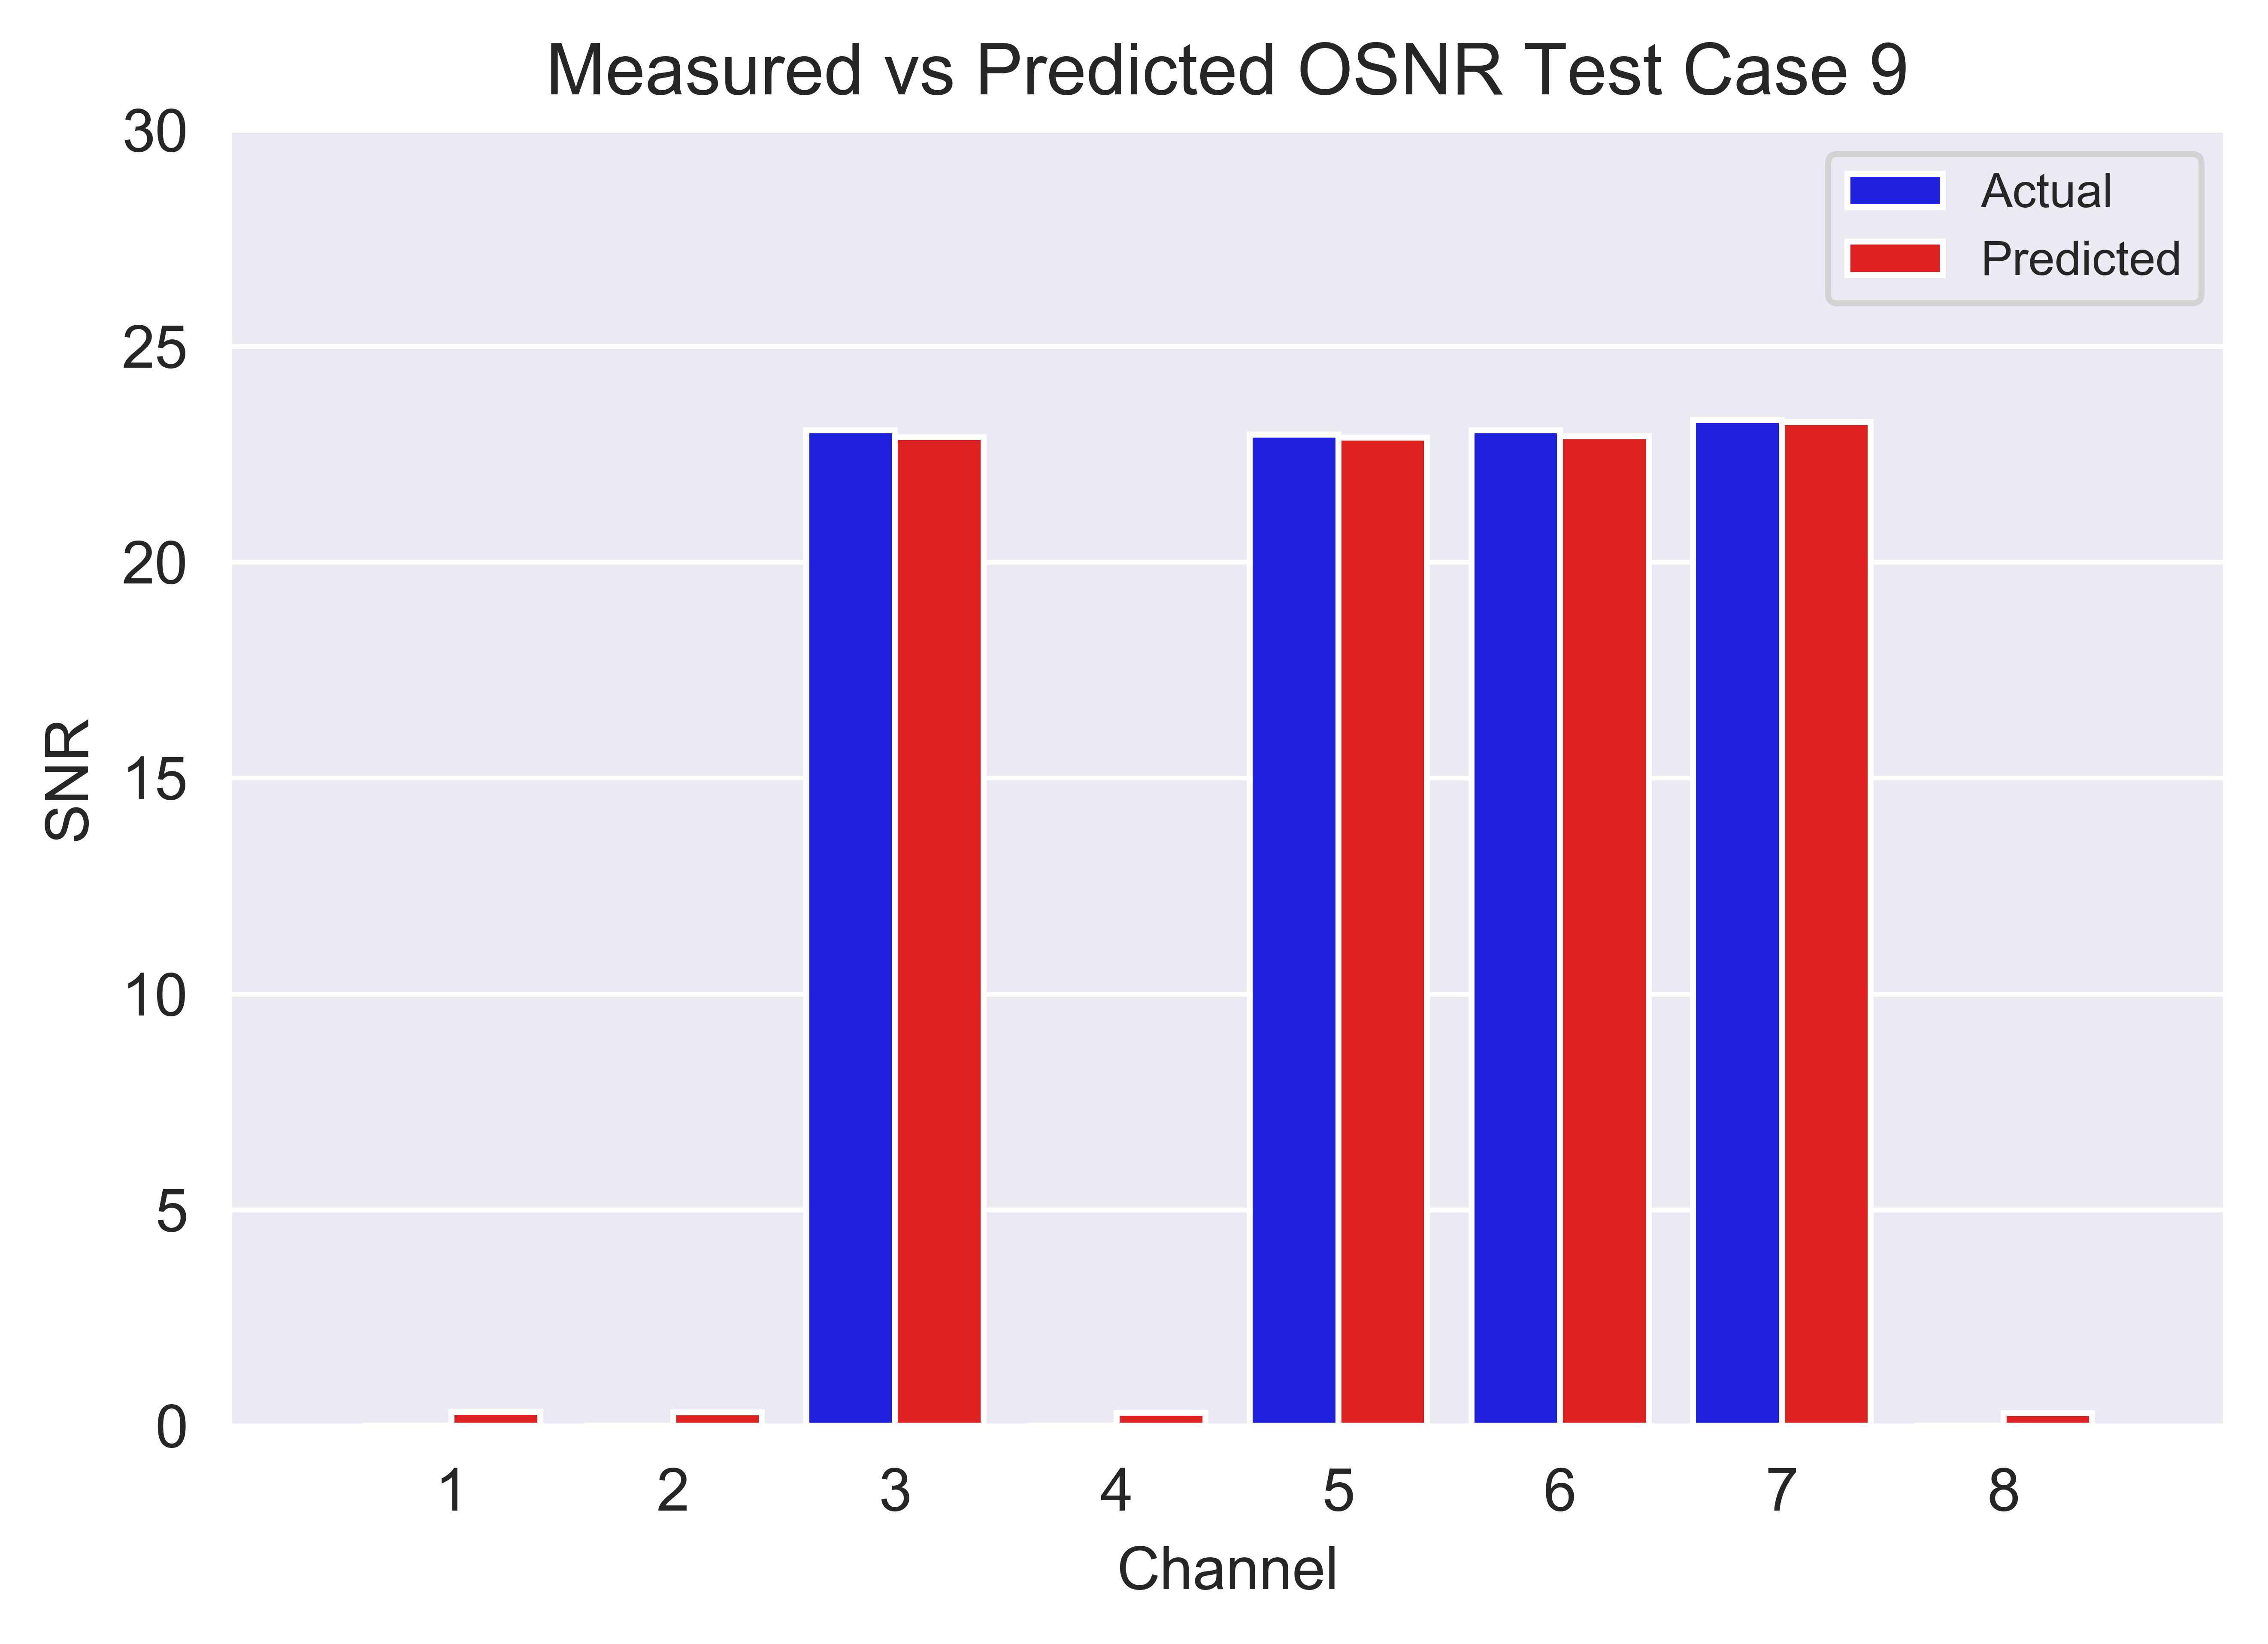

In [125]:
# Graph accuracy per test case
yVals = np.concatenate([yTest[8], yInversePredict[8]])
df_compiled = pd.DataFrame(list(zip(channels, yVals, pred_or_not)), columns =['Channel', 'SNR', 'Key'])
fig0 = sns.barplot(data = df_compiled, x='Channel', y='SNR', hue='Key', palette=['blue', 'red'])

plt.ylim(0, 30)
plt.xlim(-1, 8)
plt.title("Measured vs Predicted OSNR Test Case 9")
plt.legend(loc='upper right', prop={'size': 8}, borderaxespad=0.5)
plt.savefig('gANN_initial_pred_9', bbox_inches='tight', dpi=1000)

#### Test Phase 2: Conclusion

Predictions on new data from a new gaussian distribution with higher mu are consistently within desired accuracy range.

In the ideal case, train and test data are from the same distribution. However in practice this is not always possible. Optical networks must adapt to changes over time. For example, degredation of components such as EDFAs would alter the values of the input/output EDFA power parameters. Furthermore, increased traffic may warrant greater launch powers. 

Ultimately this causes a discrepancy between the distribution of training data & test data.

The era of 'big data', as the name suggests, puts a large emphasis on the quantity of gathered data. Data gathering is often slow and computationally taxing process in the best of cases, but it is hindered even more by the unavailability of high quality data. As a result it is not uncommon to have to train a ML model on data that is not optimal, or from a different dataset.


In the next phase, we fit the pre-existing gANN model to real world data simulated on the NDFF network.

In [ ]:
# Save model
estimator.model.save('gANN_initial_Final.h5')

In [127]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Negative mean square error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error', shuffle=True, random_state=7, verbose=1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

[learning_curve] Training set sizes: [ 719 1438 2157 2877 3596 4315 5035 5754 6473 7193]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_169 (Dense)            (None, 40)                1760      
_________________________________________________________________
dense_170 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_171 (Dense)            (None, 8)                 168       
Total params: 2,748
Trainable params: 2,748
Non-trainable params: 0
_________________________________________________________________
None


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Epoch 1/40
719/719 [==============================] - 8s 12ms/step - loss: 0.1758 - mean_squared_error: 0.1750 - mean_absolute_error: 0.3969
Epoch 2/40
719/719 [==============================] - 0s 237us/step - loss: 0.1546 - mean_squared_error: 0.1538 - mean_absolute_error: 0.3722
Epoch 3/40
719/719 [==============================] - 0s 234us/step - loss: 0.1296 - mean_squared_error: 0.1289 - mean_absolute_error: 0.3374
Epoch 4/40
719/719 [==============================] - 0s 209us/step - loss: 0.1046 - mean_squared_error: 0.1039 - mean_absolute_error: 0.3001
Epoch 5/40
719/719 [==============================] - 0s 205us/step - loss: 0.0807 - mean_squared_error: 0.0799 - mean_absolute_error: 0.2568
Epoch 6/40
719/719 [==============================] - 0s 203us/step - loss: 0.0600 - mean_squared_error: 0.0591 - mean_absolute_error: 0.2156
Epoch 7/40
719/719 [==============================] - 0s 207us/step - loss: 0.0442 - mean_squared_error: 0.0433 - mean_absolute_error: 0.1810
Epoch 8

1438/1438 [==============================] - 0s 228us/step - loss: 0.0018 - mean_squared_error: 5.6107e-04 - mean_absolute_error: 0.0191
Epoch 13/40
1438/1438 [==============================] - 0s 227us/step - loss: 0.0017 - mean_squared_error: 4.6646e-04 - mean_absolute_error: 0.0173
Epoch 14/40
1438/1438 [==============================] - 0s 228us/step - loss: 0.0017 - mean_squared_error: 4.0877e-04 - mean_absolute_error: 0.0162
Epoch 15/40
1438/1438 [==============================] - 0s 229us/step - loss: 0.0016 - mean_squared_error: 3.5826e-04 - mean_absolute_error: 0.0151
Epoch 16/40
1438/1438 [==============================] - 0s 227us/step - loss: 0.0016 - mean_squared_error: 3.3008e-04 - mean_absolute_error: 0.0145
Epoch 17/40
1438/1438 [==============================] - 0s 230us/step - loss: 0.0016 - mean_squared_error: 2.9743e-04 - mean_absolute_error: 0.0138
Epoch 18/40
1438/1438 [==============================] - 0s 231us/step - loss: 0.0016 - mean_squared_error: 2.7288e-04

2157/2157 [==============================] - 0s 219us/step - loss: 0.0014 - mean_squared_error: 1.2358e-04 - mean_absolute_error: 0.0086
Epoch 23/40
2157/2157 [==============================] - 0s 228us/step - loss: 0.0014 - mean_squared_error: 1.1863e-04 - mean_absolute_error: 0.0084
Epoch 24/40
2157/2157 [==============================] - 0s 229us/step - loss: 0.0014 - mean_squared_error: 1.4194e-04 - mean_absolute_error: 0.0090
Epoch 25/40
2157/2157 [==============================] - 0s 219us/step - loss: 0.0014 - mean_squared_error: 1.1419e-04 - mean_absolute_error: 0.0083
Epoch 26/40
2157/2157 [==============================] - 0s 228us/step - loss: 0.0014 - mean_squared_error: 1.1104e-04 - mean_absolute_error: 0.0082
Epoch 27/40
2157/2157 [==============================] - 1s 233us/step - loss: 0.0013 - mean_squared_error: 1.0713e-04 - mean_absolute_error: 0.0080
Epoch 28/40
2157/2157 [==============================] - 0s 230us/step - loss: 0.0013 - mean_squared_error: 1.0545e-04

2877/2877 [==============================] - 1s 246us/step - loss: 0.0012 - mean_squared_error: 9.5560e-05 - mean_absolute_error: 0.0077
Epoch 33/40
2877/2877 [==============================] - 1s 247us/step - loss: 0.0012 - mean_squared_error: 1.1931e-04 - mean_absolute_error: 0.0085
Epoch 34/40
2877/2877 [==============================] - 1s 244us/step - loss: 0.0012 - mean_squared_error: 8.8563e-05 - mean_absolute_error: 0.0073
Epoch 35/40
2877/2877 [==============================] - 1s 236us/step - loss: 0.0012 - mean_squared_error: 9.5320e-05 - mean_absolute_error: 0.0076
Epoch 36/40
2877/2877 [==============================] - 1s 235us/step - loss: 0.0012 - mean_squared_error: 8.6435e-05 - mean_absolute_error: 0.0072
Epoch 37/40
2877/2877 [==============================] - 1s 235us/step - loss: 0.0012 - mean_squared_error: 8.6334e-05 - mean_absolute_error: 0.0072
Epoch 38/40
2877/2877 [==============================] - 1s 236us/step - loss: 0.0012 - mean_squared_error: 8.9925e-05

Epoch 1/40
4315/4315 [==============================] - 7s 2ms/step - loss: 0.1181 - mean_squared_error: 0.1173 - mean_absolute_error: 0.3190
Epoch 2/40
4315/4315 [==============================] - 1s 218us/step - loss: 0.0225 - mean_squared_error: 0.0215 - mean_absolute_error: 0.1203
Epoch 3/40
4315/4315 [==============================] - 1s 212us/step - loss: 0.0036 - mean_squared_error: 0.0025 - mean_absolute_error: 0.0409
Epoch 4/40
4315/4315 [==============================] - 1s 219us/step - loss: 0.0021 - mean_squared_error: 8.8258e-04 - mean_absolute_error: 0.0240
Epoch 5/40
4315/4315 [==============================] - 1s 230us/step - loss: 0.0018 - mean_squared_error: 5.0993e-04 - mean_absolute_error: 0.0180
Epoch 6/40
4315/4315 [==============================] - 1s 231us/step - loss: 0.0016 - mean_squared_error: 3.5481e-04 - mean_absolute_error: 0.0150
Epoch 7/40
4315/4315 [==============================] - 1s 233us/step - loss: 0.0016 - mean_squared_error: 2.8266e-04 - mean_a

5035/5035 [==============================] - 1s 215us/step - loss: 0.0013 - mean_squared_error: 1.2731e-04 - mean_absolute_error: 0.0088
Epoch 12/40
5035/5035 [==============================] - 1s 220us/step - loss: 0.0013 - mean_squared_error: 1.1801e-04 - mean_absolute_error: 0.0084
Epoch 13/40
5035/5035 [==============================] - 1s 214us/step - loss: 0.0013 - mean_squared_error: 1.1195e-04 - mean_absolute_error: 0.0082
Epoch 14/40
5035/5035 [==============================] - 1s 214us/step - loss: 0.0013 - mean_squared_error: 1.0775e-04 - mean_absolute_error: 0.0080
Epoch 15/40
5035/5035 [==============================] - 1s 216us/step - loss: 0.0013 - mean_squared_error: 1.0580e-04 - mean_absolute_error: 0.0079
Epoch 16/40
5035/5035 [==============================] - 1s 214us/step - loss: 0.0012 - mean_squared_error: 1.0053e-04 - mean_absolute_error: 0.0078
Epoch 17/40
5035/5035 [==============================] - 1s 216us/step - loss: 0.0012 - mean_squared_error: 9.6396e-05

5754/5754 [==============================] - 1s 213us/step - loss: 0.0012 - mean_squared_error: 9.7158e-05 - mean_absolute_error: 0.0077
Epoch 22/40
5754/5754 [==============================] - 1s 213us/step - loss: 0.0011 - mean_squared_error: 9.0662e-05 - mean_absolute_error: 0.0074
Epoch 23/40
5754/5754 [==============================] - 1s 213us/step - loss: 0.0011 - mean_squared_error: 9.4407e-05 - mean_absolute_error: 0.0075
Epoch 24/40
5754/5754 [==============================] - 1s 214us/step - loss: 0.0011 - mean_squared_error: 9.0505e-05 - mean_absolute_error: 0.0073
Epoch 25/40
5754/5754 [==============================] - 1s 232us/step - loss: 0.0011 - mean_squared_error: 1.0124e-04 - mean_absolute_error: 0.0078
Epoch 26/40
5754/5754 [==============================] - 1s 224us/step - loss: 0.0011 - mean_squared_error: 1.0353e-04 - mean_absolute_error: 0.0079
Epoch 27/40
5754/5754 [==============================] - 1s 213us/step - loss: 0.0011 - mean_squared_error: 1.0052e-04

6473/6473 [==============================] - 1s 215us/step - loss: 0.0011 - mean_squared_error: 9.9393e-05 - mean_absolute_error: 0.0077
Epoch 32/40
6473/6473 [==============================] - 1s 224us/step - loss: 0.0011 - mean_squared_error: 1.0607e-04 - mean_absolute_error: 0.0080
Epoch 33/40
6473/6473 [==============================] - 2s 242us/step - loss: 0.0011 - mean_squared_error: 1.0851e-04 - mean_absolute_error: 0.0080
Epoch 34/40
6473/6473 [==============================] - 2s 235us/step - loss: 0.0011 - mean_squared_error: 9.6399e-05 - mean_absolute_error: 0.0076
Epoch 35/40
6473/6473 [==============================] - 2s 262us/step - loss: 0.0011 - mean_squared_error: 1.2299e-04 - mean_absolute_error: 0.0084
Epoch 36/40
6473/6473 [==============================] - 2s 286us/step - loss: 0.0011 - mean_squared_error: 9.6442e-05 - mean_absolute_error: 0.0076
Epoch 37/40
6473/6473 [==============================] - 2s 233us/step - loss: 0.0011 - mean_squared_error: 1.0404e-04

7193/7193 [==============================] - 2s 276us/step - loss: 0.0010 - mean_squared_error: 1.0158e-04 - mean_absolute_error: 0.0077
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 40)                1760      
_________________________________________________________________
dense_200 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_201 (Dense)            (None, 8)                 168       
Total params: 2,748
Trainable params: 2,748
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
719/719 [==============================] - 8s 12ms/step - loss: 0.1686 - mean_squared_error: 0.1679 - mean_absolute_error: 0.4014
Epoch 2/40
719/719 [==============================] - 0s 235us/step - loss: 0.1535 - mean_squared_error: 0.1527 - mean_ab

1438/1438 [==============================] - 0s 239us/step - loss: 0.0075 - mean_squared_error: 0.0064 - mean_absolute_error: 0.0680
Epoch 7/40
1438/1438 [==============================] - 0s 223us/step - loss: 0.0043 - mean_squared_error: 0.0031 - mean_absolute_error: 0.0480
Epoch 8/40
1438/1438 [==============================] - 0s 222us/step - loss: 0.0030 - mean_squared_error: 0.0018 - mean_absolute_error: 0.0364
Epoch 9/40
1438/1438 [==============================] - 0s 224us/step - loss: 0.0024 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0298
Epoch 10/40
1438/1438 [==============================] - 0s 241us/step - loss: 0.0022 - mean_squared_error: 9.6282e-04 - mean_absolute_error: 0.0261
Epoch 11/40
1438/1438 [==============================] - 0s 325us/step - loss: 0.0020 - mean_squared_error: 7.8293e-04 - mean_absolute_error: 0.0233
Epoch 12/40
1438/1438 [==============================] - 0s 308us/step - loss: 0.0019 - mean_squared_error: 6.4631e-04 - mean_absolute_er

2157/2157 [==============================] - 0s 222us/step - loss: 0.0015 - mean_squared_error: 2.3968e-04 - mean_absolute_error: 0.0126
Epoch 17/40
2157/2157 [==============================] - 0s 223us/step - loss: 0.0015 - mean_squared_error: 2.1592e-04 - mean_absolute_error: 0.0119
Epoch 18/40
2157/2157 [==============================] - 0s 222us/step - loss: 0.0014 - mean_squared_error: 1.9496e-04 - mean_absolute_error: 0.0113
Epoch 19/40
2157/2157 [==============================] - 0s 222us/step - loss: 0.0014 - mean_squared_error: 1.8244e-04 - mean_absolute_error: 0.0109
Epoch 20/40
2157/2157 [==============================] - 0s 221us/step - loss: 0.0014 - mean_squared_error: 1.7075e-04 - mean_absolute_error: 0.0106
Epoch 21/40
2157/2157 [==============================] - 1s 245us/step - loss: 0.0014 - mean_squared_error: 1.5843e-04 - mean_absolute_error: 0.0101
Epoch 22/40
2157/2157 [==============================] - 1s 309us/step - loss: 0.0014 - mean_squared_error: 1.4824e-04

2877/2877 [==============================] - 1s 232us/step - loss: 0.0012 - mean_squared_error: 8.2991e-05 - mean_absolute_error: 0.0072
Epoch 27/40
2877/2877 [==============================] - 1s 232us/step - loss: 0.0012 - mean_squared_error: 7.9319e-05 - mean_absolute_error: 0.0069
Epoch 28/40
2877/2877 [==============================] - 1s 267us/step - loss: 0.0012 - mean_squared_error: 7.9519e-05 - mean_absolute_error: 0.0070
Epoch 29/40
2877/2877 [==============================] - 1s 244us/step - loss: 0.0012 - mean_squared_error: 7.8936e-05 - mean_absolute_error: 0.0069
Epoch 30/40
2877/2877 [==============================] - 1s 230us/step - loss: 0.0012 - mean_squared_error: 8.1190e-05 - mean_absolute_error: 0.0071
Epoch 31/40
2877/2877 [==============================] - 1s 230us/step - loss: 0.0012 - mean_squared_error: 7.9061e-05 - mean_absolute_error: 0.0070
Epoch 32/40
2877/2877 [==============================] - 1s 235us/step - loss: 0.0012 - mean_squared_error: 8.0687e-05

3596/3596 [==============================] - 1s 237us/step - loss: 0.0011 - mean_squared_error: 8.3836e-05 - mean_absolute_error: 0.0073
Epoch 37/40
3596/3596 [==============================] - 1s 227us/step - loss: 0.0011 - mean_squared_error: 8.4511e-05 - mean_absolute_error: 0.0073
Epoch 38/40
3596/3596 [==============================] - 1s 227us/step - loss: 0.0011 - mean_squared_error: 9.2235e-05 - mean_absolute_error: 0.0076
Epoch 39/40
3596/3596 [==============================] - 1s 254us/step - loss: 0.0011 - mean_squared_error: 8.3634e-05 - mean_absolute_error: 0.0073
Epoch 40/40
3596/3596 [==============================] - 1s 267us/step - loss: 0.0011 - mean_squared_error: 8.5570e-05 - mean_absolute_error: 0.0074
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_214 (Dense)            (None, 40)                1760      
_________________________________________________________________
den

5035/5035 [==============================] - 8s 2ms/step - loss: 0.1050 - mean_squared_error: 0.1042 - mean_absolute_error: 0.2957
Epoch 2/40
5035/5035 [==============================] - 1s 231us/step - loss: 0.0137 - mean_squared_error: 0.0127 - mean_absolute_error: 0.0887
Epoch 3/40
5035/5035 [==============================] - 1s 232us/step - loss: 0.0026 - mean_squared_error: 0.0014 - mean_absolute_error: 0.0313
Epoch 4/40
5035/5035 [==============================] - 1s 232us/step - loss: 0.0018 - mean_squared_error: 5.9054e-04 - mean_absolute_error: 0.0200
Epoch 5/40
5035/5035 [==============================] - 1s 232us/step - loss: 0.0016 - mean_squared_error: 3.5654e-04 - mean_absolute_error: 0.0152
Epoch 6/40
5035/5035 [==============================] - 1s 247us/step - loss: 0.0015 - mean_squared_error: 2.4907e-04 - mean_absolute_error: 0.0126
Epoch 7/40
5035/5035 [==============================] - 1s 230us/step - loss: 0.0014 - mean_squared_error: 1.8459e-04 - mean_absolute_err

5754/5754 [==============================] - 1s 237us/step - loss: 0.0013 - mean_squared_error: 1.0604e-04 - mean_absolute_error: 0.0082
Epoch 12/40
5754/5754 [==============================] - 1s 241us/step - loss: 0.0013 - mean_squared_error: 9.3922e-05 - mean_absolute_error: 0.0076
Epoch 13/40
5754/5754 [==============================] - 1s 238us/step - loss: 0.0013 - mean_squared_error: 8.9747e-05 - mean_absolute_error: 0.0074
Epoch 14/40
5754/5754 [==============================] - 1s 239us/step - loss: 0.0012 - mean_squared_error: 8.7528e-05 - mean_absolute_error: 0.0074
Epoch 15/40
5754/5754 [==============================] - 1s 239us/step - loss: 0.0012 - mean_squared_error: 8.5698e-05 - mean_absolute_error: 0.0073
Epoch 16/40
5754/5754 [==============================] - 1s 238us/step - loss: 0.0012 - mean_squared_error: 8.4552e-05 - mean_absolute_error: 0.0073
Epoch 17/40
5754/5754 [==============================] - 1s 239us/step - loss: 0.0012 - mean_squared_error: 8.5871e-05

6473/6473 [==============================] - 2s 239us/step - loss: 0.0011 - mean_squared_error: 8.5620e-05 - mean_absolute_error: 0.0074
Epoch 22/40
6473/6473 [==============================] - 2s 235us/step - loss: 0.0011 - mean_squared_error: 7.8330e-05 - mean_absolute_error: 0.0070
Epoch 23/40
6473/6473 [==============================] - 2s 235us/step - loss: 0.0011 - mean_squared_error: 8.0256e-05 - mean_absolute_error: 0.0071
Epoch 24/40
6473/6473 [==============================] - 2s 235us/step - loss: 0.0011 - mean_squared_error: 8.2703e-05 - mean_absolute_error: 0.0072
Epoch 25/40
6473/6473 [==============================] - 2s 236us/step - loss: 0.0010 - mean_squared_error: 7.5689e-05 - mean_absolute_error: 0.0068
Epoch 26/40
6473/6473 [==============================] - 2s 235us/step - loss: 0.0010 - mean_squared_error: 8.2561e-05 - mean_absolute_error: 0.0072
Epoch 27/40
6473/6473 [==============================] - 2s 237us/step - loss: 0.0010 - mean_squared_error: 8.1931e-05

7193/7193 [==============================] - 2s 240us/step - loss: 0.0010 - mean_squared_error: 7.9505e-05 - mean_absolute_error: 0.0071
Epoch 32/40
7193/7193 [==============================] - 2s 238us/step - loss: 0.0010 - mean_squared_error: 7.7353e-05 - mean_absolute_error: 0.0069
Epoch 33/40
7193/7193 [==============================] - 2s 238us/step - loss: 9.9584e-04 - mean_squared_error: 7.0831e-05 - mean_absolute_error: 0.0066
Epoch 34/40
7193/7193 [==============================] - 2s 238us/step - loss: 9.9870e-04 - mean_squared_error: 7.6265e-05 - mean_absolute_error: 0.0069
Epoch 35/40
7193/7193 [==============================] - 2s 236us/step - loss: 9.9686e-04 - mean_squared_error: 7.6747e-05 - mean_absolute_error: 0.0070
Epoch 36/40
7193/7193 [==============================] - 2s 238us/step - loss: 9.9177e-04 - mean_squared_error: 7.2061e-05 - mean_absolute_error: 0.0067
Epoch 37/40
7193/7193 [==============================] - 2s 237us/step - loss: 9.9186e-04 - mean_squar

Epoch 1/40
1438/1438 [==============================] - 8s 5ms/step - loss: 0.1502 - mean_squared_error: 0.1494 - mean_absolute_error: 0.3681
Epoch 2/40
1438/1438 [==============================] - 0s 240us/step - loss: 0.1132 - mean_squared_error: 0.1124 - mean_absolute_error: 0.3141
Epoch 3/40
1438/1438 [==============================] - 0s 241us/step - loss: 0.0724 - mean_squared_error: 0.0716 - mean_absolute_error: 0.2381
Epoch 4/40
1438/1438 [==============================] - 0s 245us/step - loss: 0.0389 - mean_squared_error: 0.0380 - mean_absolute_error: 0.1641
Epoch 5/40
1438/1438 [==============================] - 0s 241us/step - loss: 0.0180 - mean_squared_error: 0.0169 - mean_absolute_error: 0.1062
Epoch 6/40
1438/1438 [==============================] - 0s 241us/step - loss: 0.0084 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0701
Epoch 7/40
1438/1438 [==============================] - 0s 243us/step - loss: 0.0045 - mean_squared_error: 0.0033 - mean_absolute_error: 0

2157/2157 [==============================] - 1s 245us/step - loss: 0.0016 - mean_squared_error: 3.7348e-04 - mean_absolute_error: 0.0151
Epoch 12/40
2157/2157 [==============================] - 1s 246us/step - loss: 0.0016 - mean_squared_error: 3.2377e-04 - mean_absolute_error: 0.0141
Epoch 13/40
2157/2157 [==============================] - 1s 249us/step - loss: 0.0016 - mean_squared_error: 2.8293e-04 - mean_absolute_error: 0.0131
Epoch 14/40
2157/2157 [==============================] - 1s 243us/step - loss: 0.0015 - mean_squared_error: 2.6570e-04 - mean_absolute_error: 0.0127
Epoch 15/40
2157/2157 [==============================] - 1s 243us/step - loss: 0.0015 - mean_squared_error: 2.5022e-04 - mean_absolute_error: 0.0123
Epoch 16/40
2157/2157 [==============================] - 1s 244us/step - loss: 0.0015 - mean_squared_error: 2.2359e-04 - mean_absolute_error: 0.0116
Epoch 17/40
2157/2157 [==============================] - 1s 242us/step - loss: 0.0015 - mean_squared_error: 1.9706e-04

2877/2877 [==============================] - 1s 238us/step - loss: 0.0013 - mean_squared_error: 9.4849e-05 - mean_absolute_error: 0.0073
Epoch 22/40
2877/2877 [==============================] - 1s 248us/step - loss: 0.0013 - mean_squared_error: 9.5177e-05 - mean_absolute_error: 0.0074
Epoch 23/40
2877/2877 [==============================] - 1s 246us/step - loss: 0.0013 - mean_squared_error: 9.3425e-05 - mean_absolute_error: 0.0074
Epoch 24/40
2877/2877 [==============================] - 1s 242us/step - loss: 0.0013 - mean_squared_error: 9.3806e-05 - mean_absolute_error: 0.0074
Epoch 25/40
2877/2877 [==============================] - 1s 242us/step - loss: 0.0013 - mean_squared_error: 8.8329e-05 - mean_absolute_error: 0.0071
Epoch 26/40
2877/2877 [==============================] - 1s 245us/step - loss: 0.0012 - mean_squared_error: 8.8665e-05 - mean_absolute_error: 0.0072
Epoch 27/40
2877/2877 [==============================] - 1s 245us/step - loss: 0.0012 - mean_squared_error: 8.9915e-05

3596/3596 [==============================] - 1s 245us/step - loss: 0.0012 - mean_squared_error: 9.3784e-05 - mean_absolute_error: 0.0075
Epoch 32/40
3596/3596 [==============================] - 1s 246us/step - loss: 0.0012 - mean_squared_error: 9.9101e-05 - mean_absolute_error: 0.0077
Epoch 33/40
3596/3596 [==============================] - 1s 245us/step - loss: 0.0011 - mean_squared_error: 9.9992e-05 - mean_absolute_error: 0.0077
Epoch 34/40
3596/3596 [==============================] - 1s 245us/step - loss: 0.0011 - mean_squared_error: 9.1395e-05 - mean_absolute_error: 0.0073
Epoch 35/40
3596/3596 [==============================] - 1s 245us/step - loss: 0.0011 - mean_squared_error: 9.1619e-05 - mean_absolute_error: 0.0073
Epoch 36/40
3596/3596 [==============================] - 1s 244us/step - loss: 0.0011 - mean_squared_error: 9.0299e-05 - mean_absolute_error: 0.0073
Epoch 37/40
3596/3596 [==============================] - 1s 244us/step - loss: 0.0011 - mean_squared_error: 1.0315e-04

4315/4315 [==============================] - 1s 248us/step - loss: 0.0011 - mean_squared_error: 9.5141e-05 - mean_absolute_error: 0.0075
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_247 (Dense)            (None, 40)                1760      
_________________________________________________________________
dense_248 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_249 (Dense)            (None, 8)                 168       
Total params: 2,748
Trainable params: 2,748
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/40
5035/5035 [==============================] - 9s 2ms/step - loss: 0.0956 - mean_squared_error: 0.0948 - mean_absolute_error: 0.2779
Epoch 2/40
5035/5035 [==============================] - 1s 250us/step - loss: 0.0133 - mean_squared_error: 0.0122 - mean

5754/5754 [==============================] - 1s 251us/step - loss: 0.0017 - mean_squared_error: 3.8007e-04 - mean_absolute_error: 0.0150
Epoch 6/40
5754/5754 [==============================] - 1s 254us/step - loss: 0.0016 - mean_squared_error: 2.7551e-04 - mean_absolute_error: 0.0127
Epoch 7/40
5754/5754 [==============================] - 1s 253us/step - loss: 0.0015 - mean_squared_error: 2.1455e-04 - mean_absolute_error: 0.0112
Epoch 8/40
5754/5754 [==============================] - 1s 254us/step - loss: 0.0015 - mean_squared_error: 1.8524e-04 - mean_absolute_error: 0.0105
Epoch 9/40
5754/5754 [==============================] - 1s 252us/step - loss: 0.0014 - mean_squared_error: 1.6417e-04 - mean_absolute_error: 0.0099
Epoch 10/40
5754/5754 [==============================] - 1s 252us/step - loss: 0.0014 - mean_squared_error: 1.5505e-04 - mean_absolute_error: 0.0097
Epoch 11/40
5754/5754 [==============================] - 1s 255us/step - loss: 0.0014 - mean_squared_error: 1.4126e-04 - m

6473/6473 [==============================] - 2s 239us/step - loss: 0.0012 - mean_squared_error: 9.9076e-05 - mean_absolute_error: 0.0076
Epoch 16/40
6473/6473 [==============================] - 2s 240us/step - loss: 0.0012 - mean_squared_error: 9.1986e-05 - mean_absolute_error: 0.0074
Epoch 17/40
6473/6473 [==============================] - 2s 235us/step - loss: 0.0012 - mean_squared_error: 9.6810e-05 - mean_absolute_error: 0.0076
Epoch 18/40
6473/6473 [==============================] - 2s 235us/step - loss: 0.0012 - mean_squared_error: 9.9611e-05 - mean_absolute_error: 0.0077
Epoch 19/40
6473/6473 [==============================] - 2s 258us/step - loss: 0.0011 - mean_squared_error: 1.0552e-04 - mean_absolute_error: 0.0079
Epoch 20/40
6473/6473 [==============================] - 721s 111ms/step - loss: 0.0011 - mean_squared_error: 9.4700e-05 - mean_absolute_error: 0.0075
Epoch 21/40
6473/6473 [==============================] - 2s 293us/step - loss: 0.0011 - mean_squared_error: 9.1229e-

7193/7193 [==============================] - 3s 399us/step - loss: 0.0011 - mean_squared_error: 8.9486e-05 - mean_absolute_error: 0.0072
Epoch 25/40
7193/7193 [==============================] - 2s 332us/step - loss: 0.0011 - mean_squared_error: 9.0827e-05 - mean_absolute_error: 0.0073
Epoch 26/40
7193/7193 [==============================] - 4s 588us/step - loss: 0.0011 - mean_squared_error: 9.3800e-05 - mean_absolute_error: 0.0075
Epoch 27/40
7193/7193 [==============================] - 2s 328us/step - loss: 0.0010 - mean_squared_error: 8.8054e-05 - mean_absolute_error: 0.0072
Epoch 28/40
7193/7193 [==============================] - 2s 276us/step - loss: 0.0011 - mean_squared_error: 9.8225e-05 - mean_absolute_error: 0.0076
Epoch 29/40
7193/7193 [==============================] - 2s 258us/step - loss: 0.0010 - mean_squared_error: 8.8241e-05 - mean_absolute_error: 0.0072
Epoch 30/40
7193/7193 [==============================] - 2s 258us/step - loss: 0.0010 - mean_squared_error: 9.4086e-05

719/719 [==============================] - 0s 268us/step - loss: 0.0017 - mean_squared_error: 3.5967e-04 - mean_absolute_error: 0.0149
Epoch 36/40
719/719 [==============================] - 0s 259us/step - loss: 0.0016 - mean_squared_error: 3.4304e-04 - mean_absolute_error: 0.0144
Epoch 37/40
719/719 [==============================] - 0s 264us/step - loss: 0.0016 - mean_squared_error: 3.4374e-04 - mean_absolute_error: 0.0147
Epoch 38/40
719/719 [==============================] - 0s 258us/step - loss: 0.0016 - mean_squared_error: 3.2665e-04 - mean_absolute_error: 0.0142
Epoch 39/40
719/719 [==============================] - 0s 268us/step - loss: 0.0016 - mean_squared_error: 3.0363e-04 - mean_absolute_error: 0.0137
Epoch 40/40
719/719 [==============================] - 0s 264us/step - loss: 0.0016 - mean_squared_error: 2.9345e-04 - mean_absolute_error: 0.0134
_________________________________________________________________
Layer (type)                 Output Shape              Param #  

Epoch 1/40
2157/2157 [==============================] - 11s 5ms/step - loss: 0.1504 - mean_squared_error: 0.1496 - mean_absolute_error: 0.3684
Epoch 2/40
2157/2157 [==============================] - 1s 274us/step - loss: 0.0845 - mean_squared_error: 0.0837 - mean_absolute_error: 0.2615
Epoch 3/40
2157/2157 [==============================] - 1s 271us/step - loss: 0.0347 - mean_squared_error: 0.0338 - mean_absolute_error: 0.1532
Epoch 4/40
2157/2157 [==============================] - 1s 306us/step - loss: 0.0139 - mean_squared_error: 0.0129 - mean_absolute_error: 0.0909
Epoch 5/40
2157/2157 [==============================] - 1s 291us/step - loss: 0.0053 - mean_squared_error: 0.0041 - mean_absolute_error: 0.0524
Epoch 6/40
2157/2157 [==============================] - 1s 321us/step - loss: 0.0028 - mean_squared_error: 0.0017 - mean_absolute_error: 0.03340s - loss: 0.0032 - mean_squared_error: 0.0021 - mean_
Epoch 7/40
2157/2157 [==============================] - 1s 448us/step - loss: 0.002

2877/2877 [==============================] - 1s 477us/step - loss: 0.0016 - mean_squared_error: 2.7746e-04 - mean_absolute_error: 0.0127
Epoch 11/40
2877/2877 [==============================] - 1s 320us/step - loss: 0.0015 - mean_squared_error: 2.4094e-04 - mean_absolute_error: 0.0118
Epoch 12/40
2877/2877 [==============================] - 1s 344us/step - loss: 0.0015 - mean_squared_error: 2.2053e-04 - mean_absolute_error: 0.0113
Epoch 13/40
2877/2877 [==============================] - 1s 395us/step - loss: 0.0015 - mean_squared_error: 1.9816e-04 - mean_absolute_error: 0.0107
Epoch 14/40
2877/2877 [==============================] - 2s 621us/step - loss: 0.0015 - mean_squared_error: 1.8445e-04 - mean_absolute_error: 0.0103
Epoch 15/40
2877/2877 [==============================] - 1s 347us/step - loss: 0.0014 - mean_squared_error: 1.7497e-04 - mean_absolute_error: 0.0101
Epoch 16/40
2877/2877 [==============================] - 1s 318us/step - loss: 0.0014 - mean_squared_error: 1.7382e-04

3596/3596 [==============================] - 1s 379us/step - loss: 0.0014 - mean_squared_error: 1.3273e-04 - mean_absolute_error: 0.0088
Epoch 20/40
3596/3596 [==============================] - 1s 292us/step - loss: 0.0013 - mean_squared_error: 1.1621e-04 - mean_absolute_error: 0.0083
Epoch 21/40
3596/3596 [==============================] - 1s 299us/step - loss: 0.0013 - mean_squared_error: 1.1635e-04 - mean_absolute_error: 0.0083
Epoch 22/40
3596/3596 [==============================] - 1s 312us/step - loss: 0.0013 - mean_squared_error: 1.2136e-04 - mean_absolute_error: 0.0085
Epoch 23/40
3596/3596 [==============================] - 1s 405us/step - loss: 0.0013 - mean_squared_error: 1.1507e-04 - mean_absolute_error: 0.0082
Epoch 24/40
3596/3596 [==============================] - 1s 379us/step - loss: 0.0013 - mean_squared_error: 1.1381e-04 - mean_absolute_error: 0.0082
Epoch 25/40
3596/3596 [==============================] - 2s 667us/step - loss: 0.0013 - mean_squared_error: 1.0244e-04

4315/4315 [==============================] - 1s 335us/step - loss: 0.0012 - mean_squared_error: 1.0328e-04 - mean_absolute_error: 0.0079
Epoch 29/40
4315/4315 [==============================] - 2s 414us/step - loss: 0.0011 - mean_squared_error: 8.9900e-05 - mean_absolute_error: 0.0073
Epoch 30/40
4315/4315 [==============================] - 1s 338us/step - loss: 0.0011 - mean_squared_error: 1.0005e-04 - mean_absolute_error: 0.0076
Epoch 31/40
4315/4315 [==============================] - 2s 427us/step - loss: 0.0011 - mean_squared_error: 1.0012e-04 - mean_absolute_error: 0.0077
Epoch 32/40
4315/4315 [==============================] - 1s 287us/step - loss: 0.0011 - mean_squared_error: 8.8846e-05 - mean_absolute_error: 0.0073
Epoch 33/40
4315/4315 [==============================] - 1s 325us/step - loss: 0.0011 - mean_squared_error: 1.0134e-04 - mean_absolute_error: 0.0077
Epoch 34/40
4315/4315 [==============================] - 2s 564us/step - loss: 0.0011 - mean_squared_error: 9.0374e-05

5035/5035 [==============================] - 2s 456us/step - loss: 0.0011 - mean_squared_error: 1.0421e-04 - mean_absolute_error: 0.0076
Epoch 38/40
5035/5035 [==============================] - 2s 426us/step - loss: 0.0011 - mean_squared_error: 9.0426e-05 - mean_absolute_error: 0.0073
Epoch 39/40
5035/5035 [==============================] - 3s 531us/step - loss: 0.0011 - mean_squared_error: 9.9970e-05 - mean_absolute_error: 0.0076
Epoch 40/40
5035/5035 [==============================] - 3s 533us/step - loss: 0.0011 - mean_squared_error: 9.0207e-05 - mean_absolute_error: 0.0072
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_280 (Dense)            (None, 40)                1760      
_________________________________________________________________
dense_281 (Dense)            (None, 20)                820       
_________________________________________________________________
dense_282 (Dense)   

6473/6473 [==============================] - 2s 379us/step - loss: 0.0196 - mean_squared_error: 0.0185 - mean_absolute_error: 0.1027
Epoch 3/40
6473/6473 [==============================] - 4s 607us/step - loss: 0.0047 - mean_squared_error: 0.0034 - mean_absolute_error: 0.0415
Epoch 4/40
6473/6473 [==============================] - 2s 367us/step - loss: 0.0019 - mean_squared_error: 6.1354e-04 - mean_absolute_error: 0.0199
Epoch 5/40
6473/6473 [==============================] - 5s 725us/step - loss: 0.0017 - mean_squared_error: 4.0762e-04 - mean_absolute_error: 0.0161
Epoch 6/40
6473/6473 [==============================] - 4s 633us/step - loss: 0.0016 - mean_squared_error: 3.0812e-04 - mean_absolute_error: 0.0139
Epoch 7/40
6473/6473 [==============================] - 3s 430us/step - loss: 0.0015 - mean_squared_error: 2.3741e-04 - mean_absolute_error: 0.0121
Epoch 8/40
6473/6473 [==============================] - 2s 360us/step - loss: 0.0015 - mean_squared_error: 1.7628e-04 - mean_absolu

7193/7193 [==============================] - 3s 398us/step - loss: 0.0012 - mean_squared_error: 9.4287e-05 - mean_absolute_error: 0.0074
Epoch 13/40
7193/7193 [==============================] - 2s 303us/step - loss: 0.0012 - mean_squared_error: 1.0266e-04 - mean_absolute_error: 0.0077
Epoch 14/40
7193/7193 [==============================] - 3s 399us/step - loss: 0.0012 - mean_squared_error: 9.8435e-05 - mean_absolute_error: 0.0076
Epoch 15/40
7193/7193 [==============================] - 3s 435us/step - loss: 0.0012 - mean_squared_error: 9.4067e-05 - mean_absolute_error: 0.0075
Epoch 16/40
7193/7193 [==============================] - 3s 371us/step - loss: 0.0012 - mean_squared_error: 1.0651e-04 - mean_absolute_error: 0.0078
Epoch 17/40
7193/7193 [==============================] - 3s 391us/step - loss: 0.0012 - mean_squared_error: 9.4963e-05 - mean_absolute_error: 0.0075
Epoch 18/40
7193/7193 [==============================] - 3s 399us/step - loss: 0.0011 - mean_squared_error: 9.6529e-05

719/719 [==============================] - 0s 577us/step - loss: 0.0020 - mean_squared_error: 7.4939e-04 - mean_absolute_error: 0.0222
Epoch 24/40
719/719 [==============================] - 1s 1ms/step - loss: 0.0019 - mean_squared_error: 6.8017e-04 - mean_absolute_error: 0.0212
Epoch 25/40
719/719 [==============================] - 0s 398us/step - loss: 0.0019 - mean_squared_error: 6.2524e-04 - mean_absolute_error: 0.0202
Epoch 26/40
719/719 [==============================] - 0s 529us/step - loss: 0.0018 - mean_squared_error: 5.9076e-04 - mean_absolute_error: 0.0197
Epoch 27/40
719/719 [==============================] - 0s 466us/step - loss: 0.0018 - mean_squared_error: 5.5399e-04 - mean_absolute_error: 0.0191
Epoch 28/40
719/719 [==============================] - 0s 343us/step - loss: 0.0018 - mean_squared_error: 5.2858e-04 - mean_absolute_error: 0.0187
Epoch 29/40
719/719 [==============================] - 0s 390us/step - loss: 0.0018 - mean_squared_error: 5.0819e-04 - mean_absolute

1438/1438 [==============================] - 1s 385us/step - loss: 0.0014 - mean_squared_error: 1.1648e-04 - mean_absolute_error: 0.0082
Epoch 34/40
1438/1438 [==============================] - 1s 415us/step - loss: 0.0014 - mean_squared_error: 1.1367e-04 - mean_absolute_error: 0.0081
Epoch 35/40
1438/1438 [==============================] - 0s 275us/step - loss: 0.0014 - mean_squared_error: 1.1337e-04 - mean_absolute_error: 0.0082
Epoch 36/40
1438/1438 [==============================] - 1s 374us/step - loss: 0.0013 - mean_squared_error: 1.0836e-04 - mean_absolute_error: 0.0079
Epoch 37/40
1438/1438 [==============================] - 1s 409us/step - loss: 0.0013 - mean_squared_error: 1.0264e-04 - mean_absolute_error: 0.0076
Epoch 38/40
1438/1438 [==============================] - 0s 287us/step - loss: 0.0013 - mean_squared_error: 1.0355e-04 - mean_absolute_error: 0.0078
Epoch 39/40
1438/1438 [==============================] - 1s 440us/step - loss: 0.0013 - mean_squared_error: 1.0230e-04

Epoch 1/40
2877/2877 [==============================] - 15s 5ms/step - loss: 0.1206 - mean_squared_error: 0.1198 - mean_absolute_error: 0.3232
Epoch 2/40
2877/2877 [==============================] - 1s 437us/step - loss: 0.0453 - mean_squared_error: 0.0443 - mean_absolute_error: 0.1752
Epoch 3/40
2877/2877 [==============================] - 1s 407us/step - loss: 0.0131 - mean_squared_error: 0.0120 - mean_absolute_error: 0.0855
Epoch 4/40
2877/2877 [==============================] - 1s 385us/step - loss: 0.0041 - mean_squared_error: 0.0030 - mean_absolute_error: 0.0439
Epoch 5/40
2877/2877 [==============================] - 1s 447us/step - loss: 0.0025 - mean_squared_error: 0.0013 - mean_absolute_error: 0.0296
Epoch 6/40
2877/2877 [==============================] - 1s 331us/step - loss: 0.0021 - mean_squared_error: 8.4379e-04 - mean_absolute_error: 0.0235
Epoch 7/40
2877/2877 [==============================] - 1s 317us/step - loss: 0.0019 - mean_squared_error: 6.1005e-04 - mean_absolute

3596/3596 [==============================] - 1s 280us/step - loss: 0.0014 - mean_squared_error: 1.7087e-04 - mean_absolute_error: 0.0099
Epoch 12/40
3596/3596 [==============================] - 1s 312us/step - loss: 0.0014 - mean_squared_error: 1.4739e-04 - mean_absolute_error: 0.0091
Epoch 13/40
3596/3596 [==============================] - 1s 314us/step - loss: 0.0014 - mean_squared_error: 1.3119e-04 - mean_absolute_error: 0.0085
Epoch 14/40
3596/3596 [==============================] - 1s 280us/step - loss: 0.0014 - mean_squared_error: 1.2032e-04 - mean_absolute_error: 0.0081
Epoch 15/40
3596/3596 [==============================] - 1s 324us/step - loss: 0.0013 - mean_squared_error: 1.1301e-04 - mean_absolute_error: 0.0079
Epoch 16/40
3596/3596 [==============================] - 1s 294us/step - loss: 0.0013 - mean_squared_error: 1.0517e-04 - mean_absolute_error: 0.0076
Epoch 17/40
3596/3596 [==============================] - 1s 402us/step - loss: 0.0013 - mean_squared_error: 1.0256e-04

4315/4315 [==============================] - 1s 299us/step - loss: 0.0012 - mean_squared_error: 1.0055e-04 - mean_absolute_error: 0.0076
Epoch 22/40
4315/4315 [==============================] - 1s 293us/step - loss: 0.0012 - mean_squared_error: 1.0033e-04 - mean_absolute_error: 0.0076
Epoch 23/40
4315/4315 [==============================] - 1s 300us/step - loss: 0.0012 - mean_squared_error: 1.0541e-04 - mean_absolute_error: 0.0079
Epoch 24/40
4315/4315 [==============================] - 1s 281us/step - loss: 0.0012 - mean_squared_error: 1.1032e-04 - mean_absolute_error: 0.0080
Epoch 25/40
4315/4315 [==============================] - 1s 292us/step - loss: 0.0012 - mean_squared_error: 1.0034e-04 - mean_absolute_error: 0.0076
Epoch 26/40
4315/4315 [==============================] - 1s 330us/step - loss: 0.0012 - mean_squared_error: 9.2502e-05 - mean_absolute_error: 0.0073
Epoch 27/40
4315/4315 [==============================] - 1s 285us/step - loss: 0.0012 - mean_squared_error: 8.9830e-05

5035/5035 [==============================] - 2s 315us/step - loss: 0.0011 - mean_squared_error: 8.4452e-05 - mean_absolute_error: 0.0070
Epoch 32/40
5035/5035 [==============================] - 1s 290us/step - loss: 0.0011 - mean_squared_error: 8.3461e-05 - mean_absolute_error: 0.0069
Epoch 33/40
5035/5035 [==============================] - 2s 321us/step - loss: 0.0011 - mean_squared_error: 8.8977e-05 - mean_absolute_error: 0.0072
Epoch 34/40
5035/5035 [==============================] - 1s 282us/step - loss: 0.0010 - mean_squared_error: 8.0645e-05 - mean_absolute_error: 0.0068
Epoch 35/40
5035/5035 [==============================] - 1s 281us/step - loss: 0.0010 - mean_squared_error: 8.3870e-05 - mean_absolute_error: 0.00691s - loss: 0.0010 - mean_squar
Epoch 36/40
5035/5035 [==============================] - 1s 283us/step - loss: 0.0010 - mean_squared_error: 7.7473e-05 - mean_absolute_error: 0.0066
Epoch 37/40
5035/5035 [==============================] - 1s 285us/step - loss: 0.0010 - 

Epoch 1/40
6473/6473 [==============================] - 13s 2ms/step - loss: 0.0832 - mean_squared_error: 0.0823 - mean_absolute_error: 0.2501
Epoch 2/40
6473/6473 [==============================] - 2s 340us/step - loss: 0.0076 - mean_squared_error: 0.0065 - mean_absolute_error: 0.0606
Epoch 3/40
6473/6473 [==============================] - 2s 359us/step - loss: 0.0022 - mean_squared_error: 9.8726e-04 - mean_absolute_error: 0.0251
Epoch 4/40
6473/6473 [==============================] - 2s 313us/step - loss: 0.0018 - mean_squared_error: 5.2166e-04 - mean_absolute_error: 0.0184
Epoch 5/40
6473/6473 [==============================] - 2s 337us/step - loss: 0.0016 - mean_squared_error: 3.6860e-04 - mean_absolute_error: 0.0154
Epoch 6/40
6473/6473 [==============================] - 2s 334us/step - loss: 0.0015 - mean_squared_error: 3.0033e-04 - mean_absolute_error: 0.0138
Epoch 7/40
6473/6473 [==============================] - 2s 333us/step - loss: 0.0015 - mean_squared_error: 2.1368e-04 - m

7193/7193 [==============================] - 2s 301us/step - loss: 0.0013 - mean_squared_error: 9.7032e-05 - mean_absolute_error: 0.0075
Epoch 12/40
7193/7193 [==============================] - 2s 306us/step - loss: 0.0012 - mean_squared_error: 9.4529e-05 - mean_absolute_error: 0.0074
Epoch 13/40
7193/7193 [==============================] - 2s 300us/step - loss: 0.0012 - mean_squared_error: 1.0144e-04 - mean_absolute_error: 0.0077
Epoch 14/40
7193/7193 [==============================] - 2s 299us/step - loss: 0.0012 - mean_squared_error: 1.0190e-04 - mean_absolute_error: 0.0077
Epoch 15/40
7193/7193 [==============================] - 2s 298us/step - loss: 0.0012 - mean_squared_error: 8.7937e-05 - mean_absolute_error: 0.0071
Epoch 16/40
7193/7193 [==============================] - 2s 296us/step - loss: 0.0011 - mean_squared_error: 8.6321e-05 - mean_absolute_error: 0.0071
Epoch 17/40
7193/7193 [==============================] - 2s 299us/step - loss: 0.0011 - mean_squared_error: 9.5655e-05

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 62.7min finished


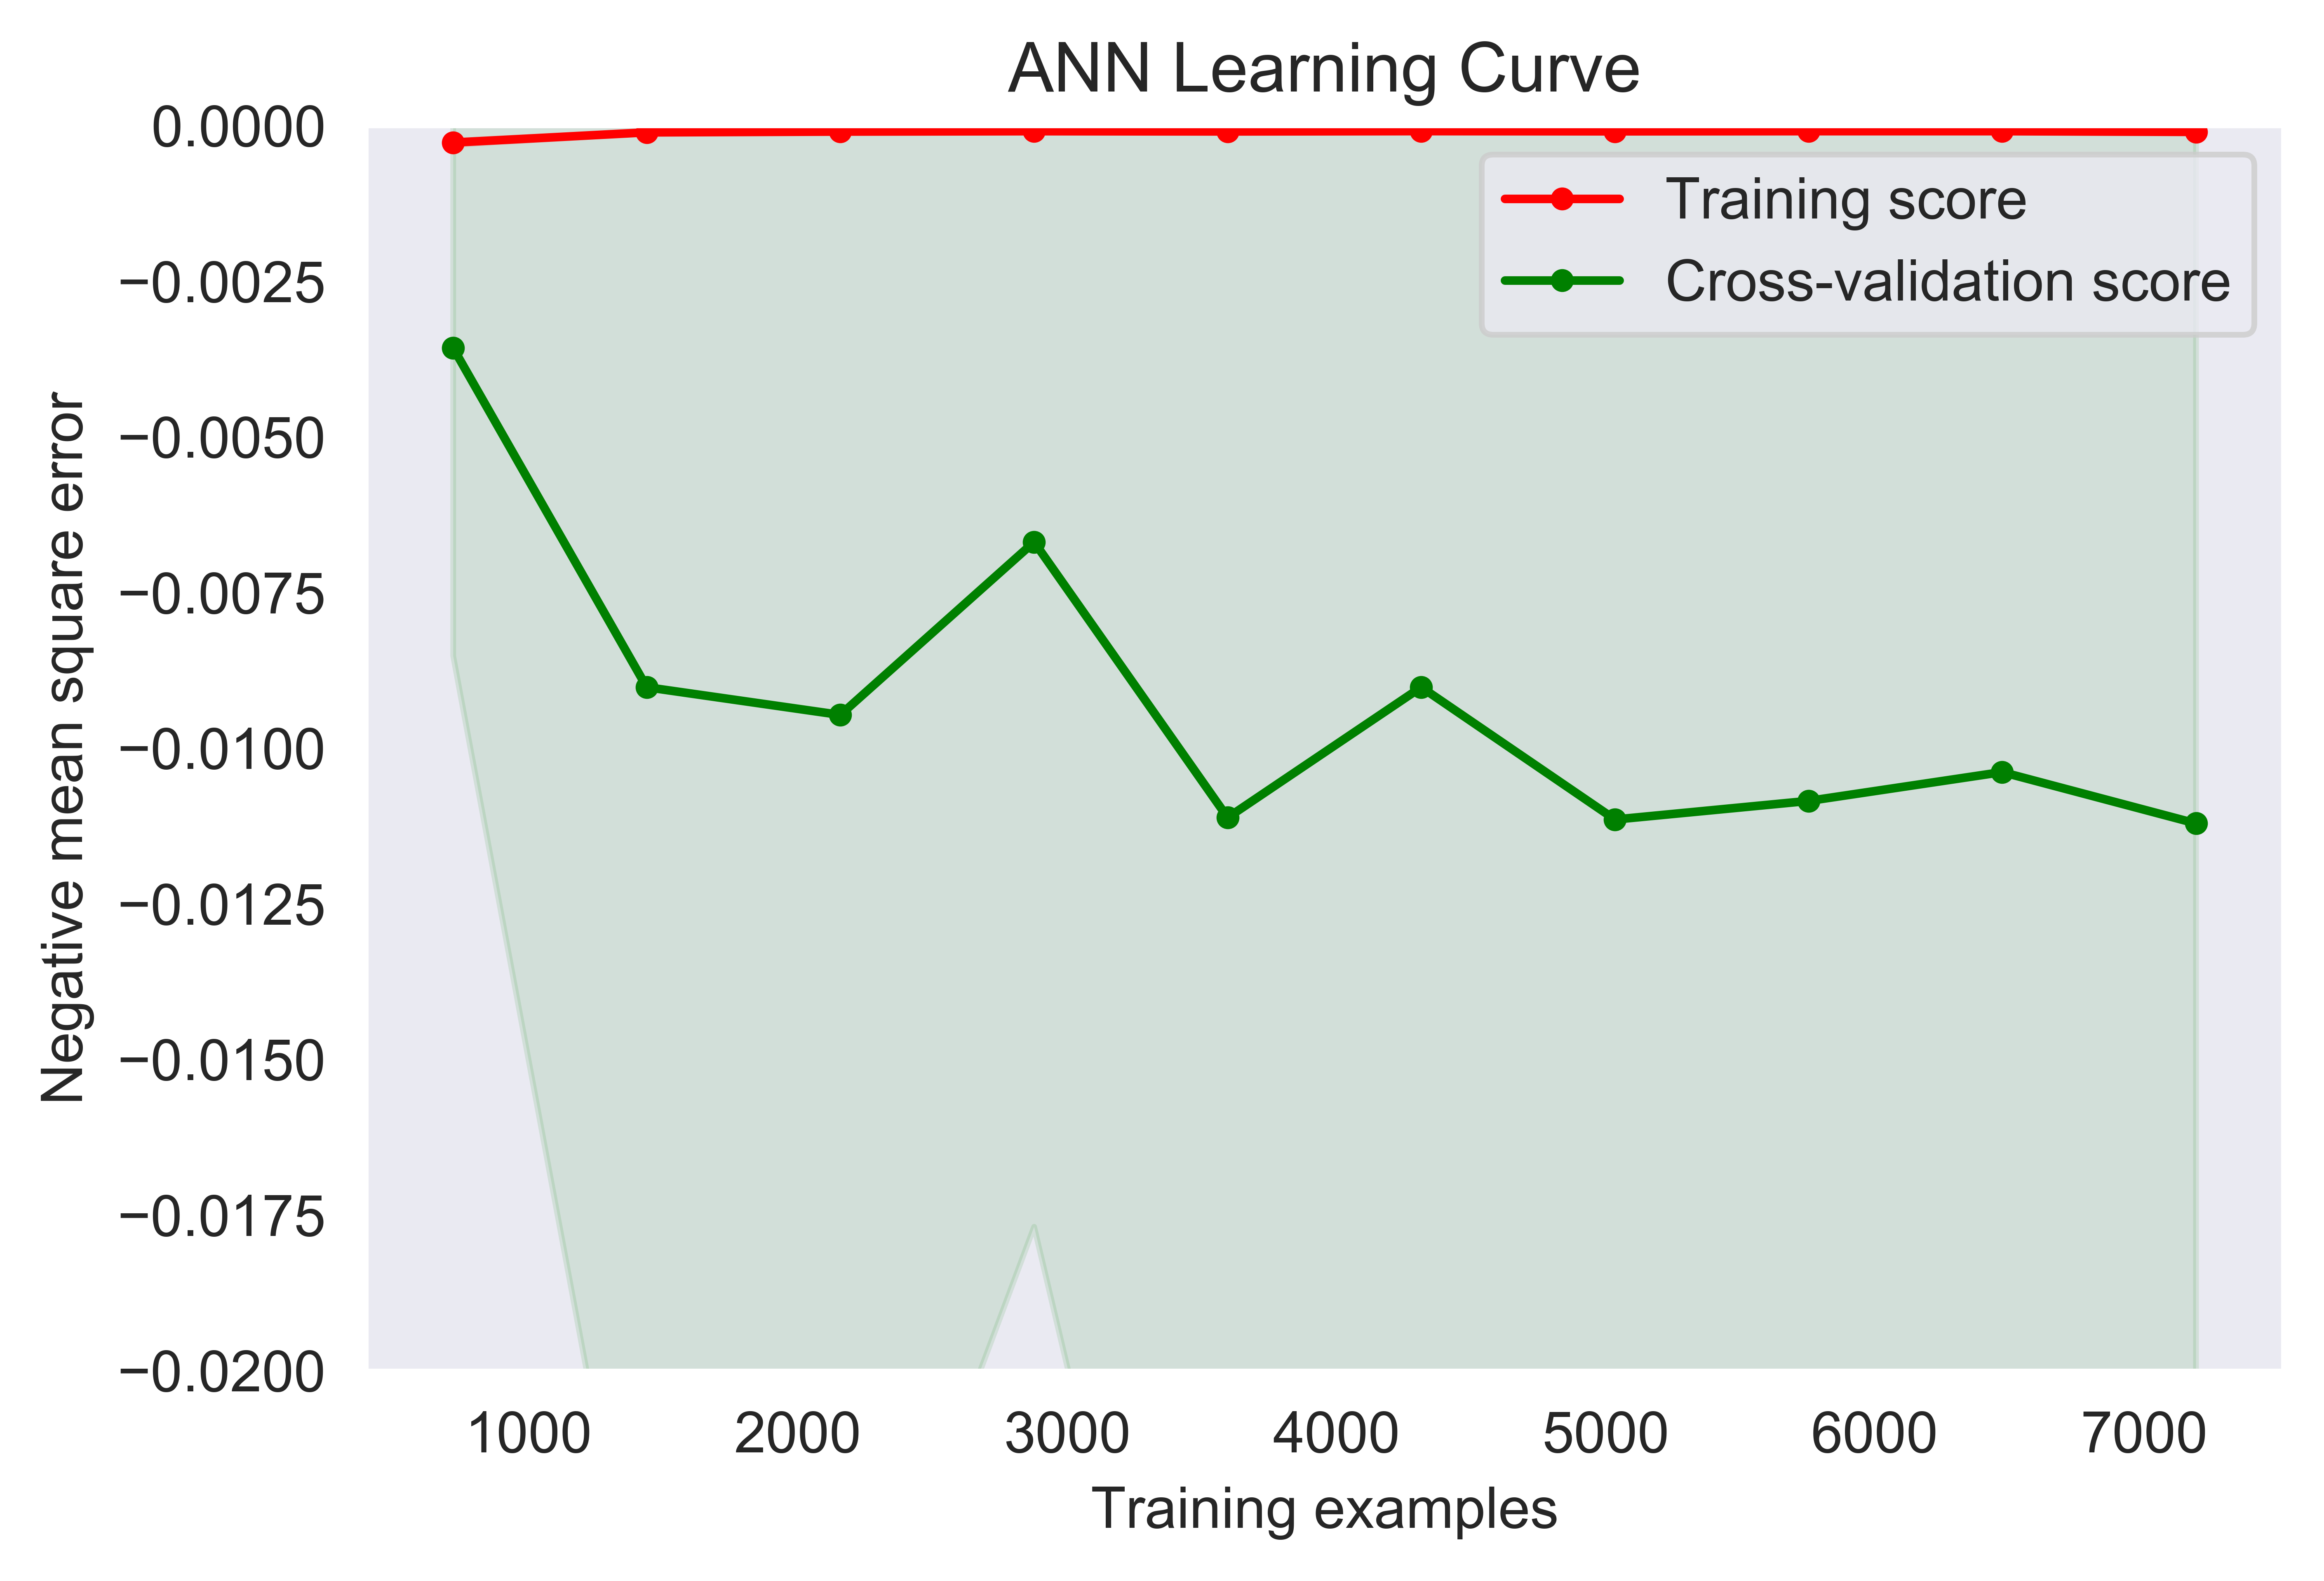

In [129]:
# Learning Curve for 5 Fold Cross validation
plot_learning_curve(estimator, "ANN Learning Curve", xTrainNorm, yTrainNorm, (-0.02, 0), cv=5)
plt.savefig('ANN_Learning_Curve_v_2.png')
plt.show()